# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.


# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.


In [452]:
import pandas as pd

In [453]:
# Читаем данные

X_train = pd.read_csv("train_features_with_answers.csv")

In [454]:
# Про характеристики прочитайте в источнике

X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


In [455]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder


In [456]:
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:

- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

**Основной критерий оценивания** - читаемость и интерпретируемость данных.


## Характеристика: "Sex"


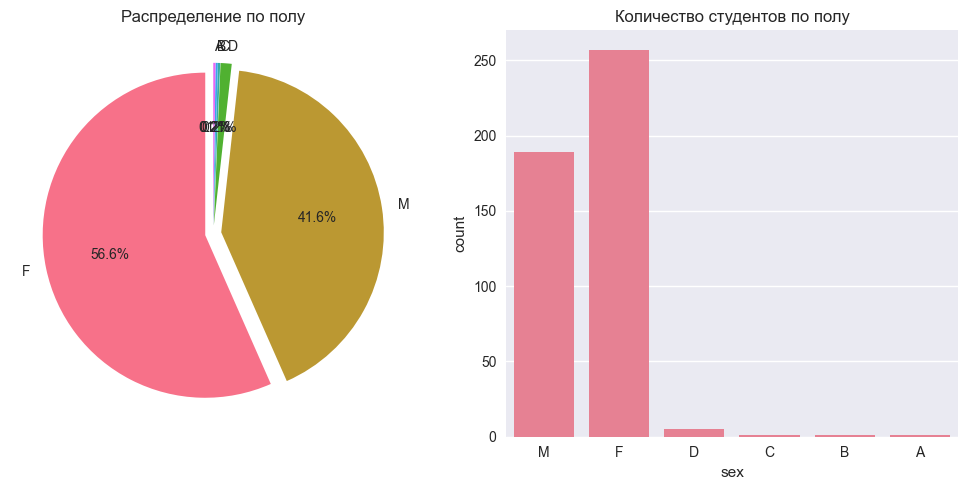

In [457]:
# Круговая диаграмма для пола
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sex_counts = X_train["sex"].value_counts()
plt.pie(
  sex_counts.values,
  labels=sex_counts.index,
  autopct="%1.1f%%",
  startangle=90,
  explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05),
)
plt.title("Распределение по полу")

plt.subplot(1, 2, 2)
sns.countplot(data=X_train, x="sex")
plt.title("Количество студентов по полу")

plt.tight_layout()
plt.show()

## Характеристика: "Age"


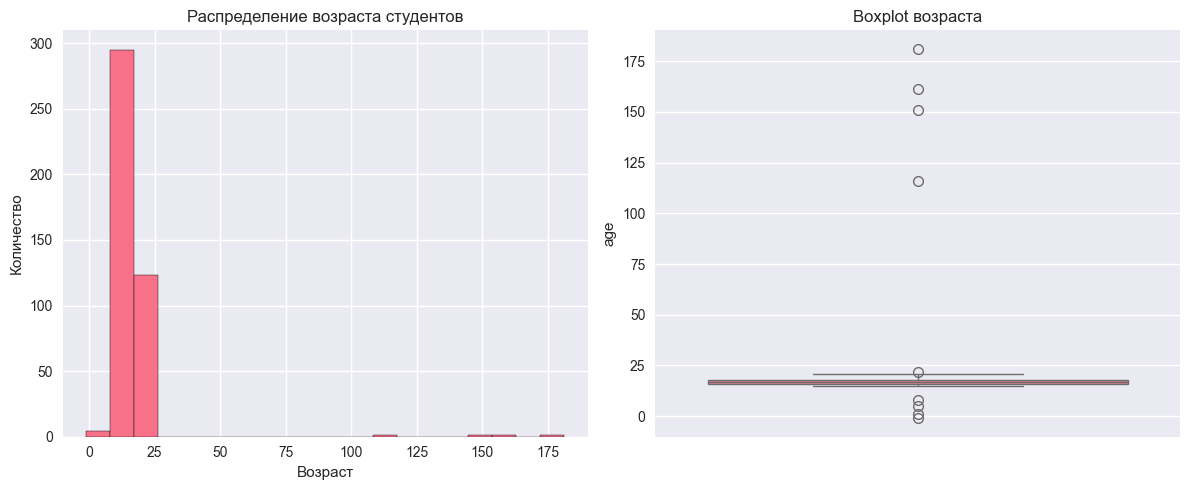

Статистика по возрасту:
count    426.000000
mean      17.922535
std       13.417850
min       -1.000000
25%       16.000000
50%       17.000000
75%       18.000000
max      181.000000
Name: age, dtype: float64


In [458]:
# Гистограмма для возраста
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
X_train["age"].hist(bins=20, edgecolor="black")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.title("Распределение возраста студентов")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train, y="age")
plt.title("Boxplot возраста")

plt.tight_layout()
plt.show()

# Статистика по возрасту
print("Статистика по возрасту:")
print(X_train["age"].describe())

## Характеристика: "Weekly study time"


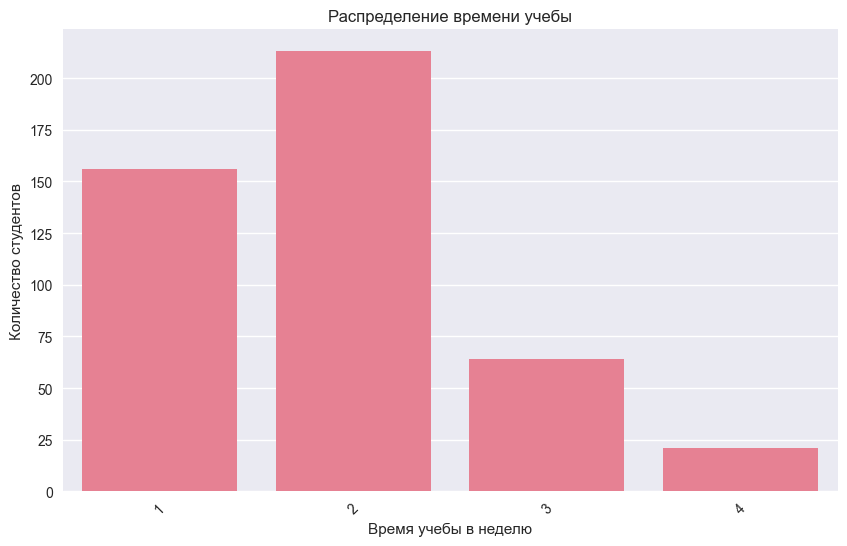

In [459]:
# Столбчатая диаграмма для времени учебы
plt.figure(figsize=(10, 6))
study_time_order = [
  "1 - <2 hours",
  "2 - 2 to 5 hours",
  "3 - 5 to 10 hours",
  "4 - >10 hours",
]
study_counts = X_train["studytime"].value_counts().sort_index()

sns.barplot(x=study_counts.index, y=study_counts.values)
plt.xlabel("Время учебы в неделю")
plt.ylabel("Количество студентов")
plt.title("Распределение времени учебы")
plt.xticks(rotation=45)
plt.show()

## Характеристика: "Romantic Relationship"


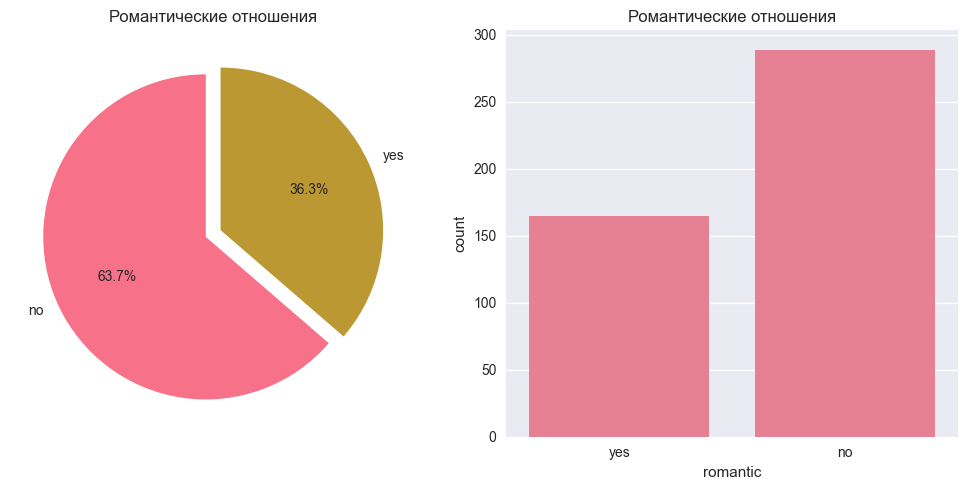

In [460]:
# Круговая диаграмма для романтических отношений
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
romantic_counts = X_train["romantic"].value_counts()
plt.pie(
  romantic_counts.values,
  labels=romantic_counts.index,
  autopct="%1.1f%%",
  startangle=90,
  explode=(0.05, 0.05),
)
plt.title("Романтические отношения")

plt.subplot(1, 2, 2)
sns.countplot(data=X_train, x="romantic")
plt.title("Романтические отношения")

plt.tight_layout()
plt.show()

## Характеристика: "Alcohol Consumption"


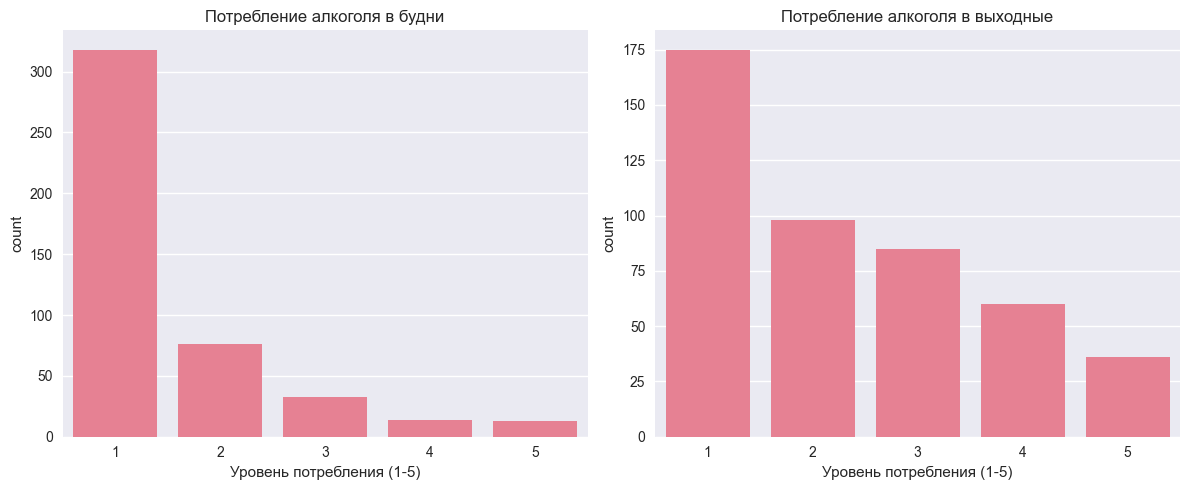

In [461]:
# Графики потребления алкоголя
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Потребление алкоголя в будни
sns.countplot(data=X_train, x="Dalc", ax=axes[0])
axes[0].set_title("Потребление алкоголя в будни")
axes[0].set_xlabel("Уровень потребления (1-5)")

# Потребление алкоголя в выходные
sns.countplot(data=X_train, x="Walc", ax=axes[1])
axes[1].set_title("Потребление алкоголя в выходные")
axes[1].set_xlabel("Уровень потребления (1-5)")

plt.tight_layout()
plt.show()

## Целевая зависимость: "G3" (Final Grade)


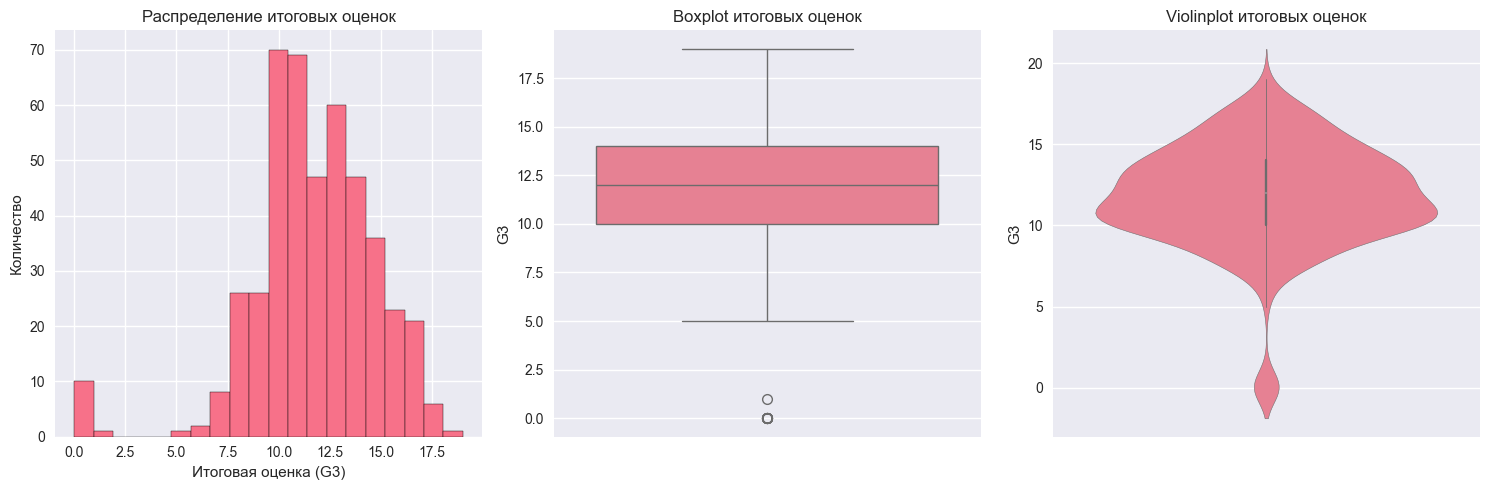

Статистика по итоговым оценкам:
count    454.000000
mean      11.825991
std        3.185665
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


In [462]:
# Анализ итоговых оценок
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
X_train["G3"].hist(bins=20, edgecolor="black")
plt.xlabel("Итоговая оценка (G3)")
plt.ylabel("Количество")
plt.title("Распределение итоговых оценок")

plt.subplot(1, 3, 2)
sns.boxplot(data=X_train, y="G3")
plt.title("Boxplot итоговых оценок")

plt.subplot(1, 3, 3)
sns.violinplot(data=X_train, y="G3")
plt.title("Violinplot итоговых оценок")

plt.tight_layout()
plt.show()

print("Статистика по итоговым оценкам:")
print(X_train["G3"].describe())

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:

- pieplot
- boxplot
- violinplot


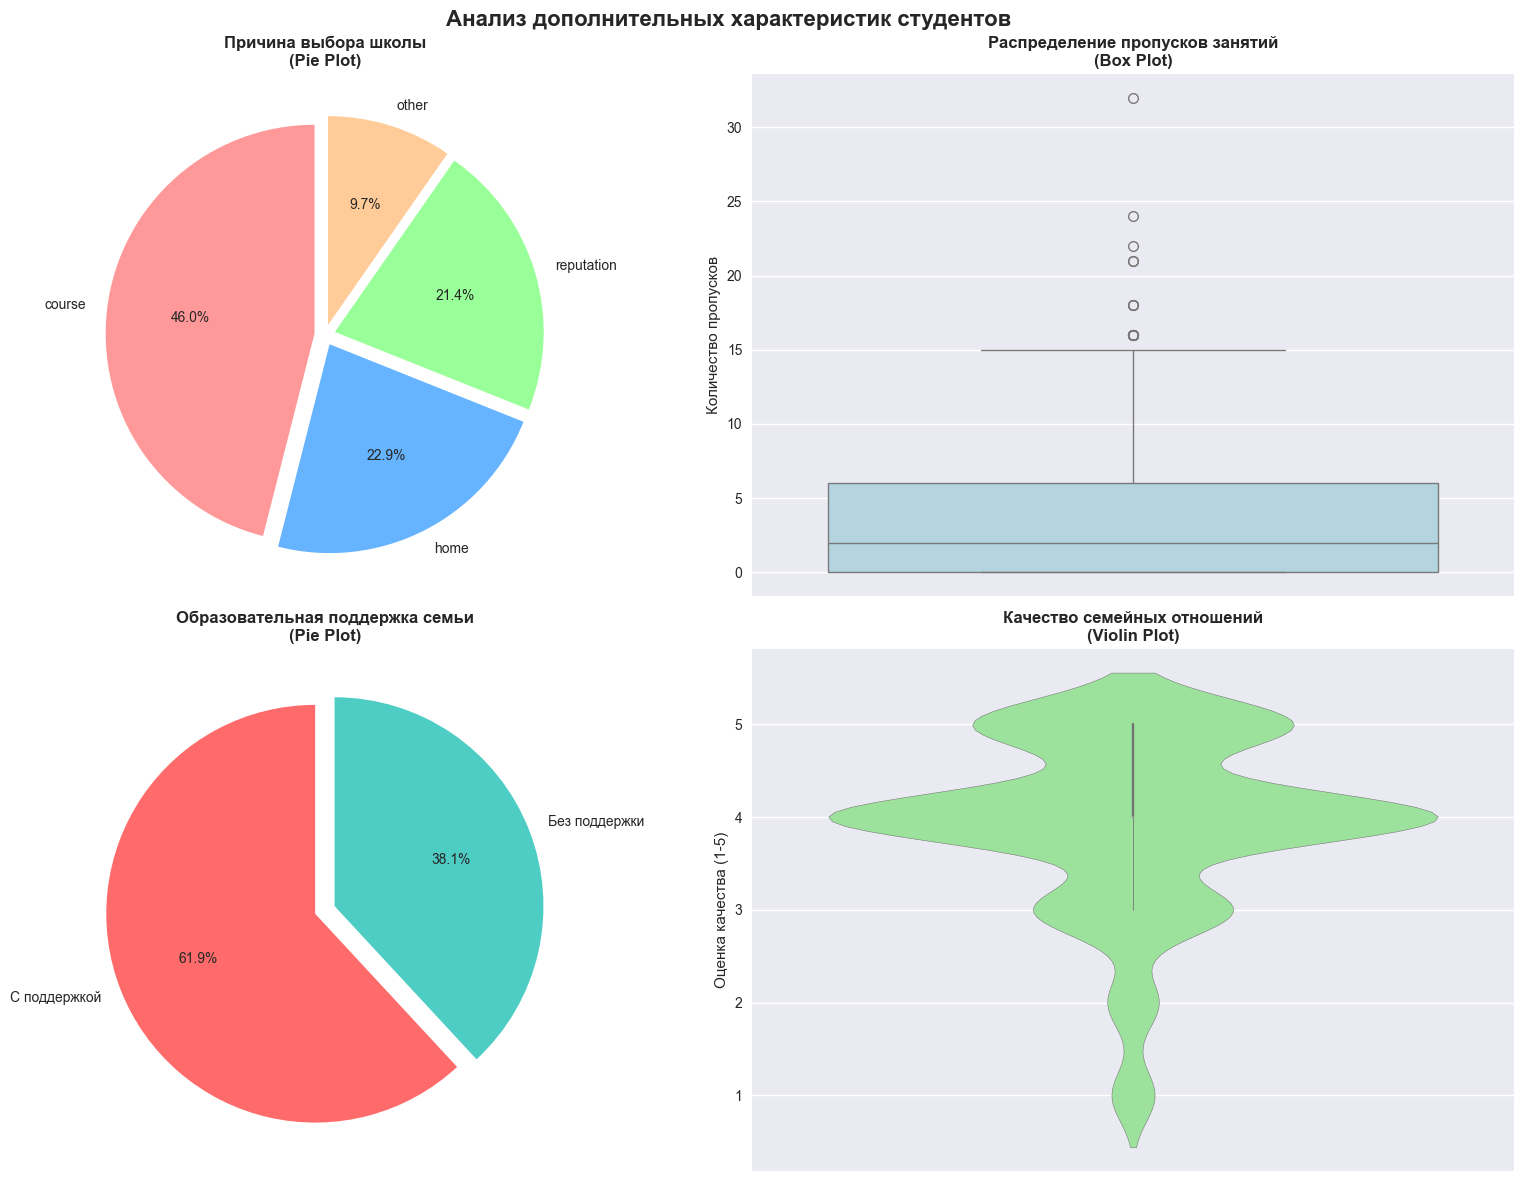

In [463]:
# Создаем фигуру для 4 графиков
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(
  "Анализ дополнительных характеристик студентов", fontsize=16, fontweight="bold"
)

## КАТЕГОРИАЛЬНАЯ ХАРАКТЕРИСТИКА 1: "Reason for choosing school" (причина выбора школы)
plt.subplot(2, 2, 1)
reason_counts = X_train["reason"].value_counts()
plt.pie(
  reason_counts.values,
  labels=reason_counts.index,
  autopct="%1.1f%%",
  startangle=90,
  colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"],
  explode=(0.05, 0.05, 0.05, 0.05),
)
plt.title("Причина выбора школы\n(Pie Plot)", fontweight="bold")

## ЧИСЛОВАЯ ХАРАКТЕРИСТИКА 1: "Absences" (пропуски занятий)
plt.subplot(2, 2, 2)
sns.boxplot(data=X_train, y="absences", color="lightblue")
plt.title("Распределение пропусков занятий\n(Box Plot)", fontweight="bold")
plt.ylabel("Количество пропусков")

## КАТЕГОРИАЛЬНАЯ ХАРАКТЕРИСТИКА 2: "Family educational support" (поддержка семьи)
plt.subplot(2, 2, 3)
famsup_counts = X_train["famsup"].value_counts()
plt.pie(
  famsup_counts.values,
  labels=["С поддержкой", "Без поддержки"],
  autopct="%1.1f%%",
  startangle=90,
  colors=["#ff6b6b", "#4ecdc4"],
  explode=(0.05, 0.05),
)
plt.title("Образовательная поддержка семьи\n(Pie Plot)", fontweight="bold")

## ЧИСЛОВАЯ ХАРАКТЕРИСТИКА 2: "Family relationship quality" (качество семейных отношений)
plt.subplot(2, 2, 4)
sns.violinplot(data=X_train, y="famrel", color="lightgreen")
plt.title("Качество семейных отношений\n(Violin Plot)", fontweight="bold")
plt.ylabel("Оценка качества (1-5)")

plt.tight_layout()
plt.show()

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.


In [464]:
# Создаем копию данных для обработки
df = X_train.copy()

# Создаем копию датафрейма для кодирования
df_encoded = df.copy()

# Кодируем бинарные категориальные переменные
binary_columns = [
  "school",
  "sex",
  "address",
  "famsize",
  "Pstatus",
  "schoolsup",
  "famsup",
  "paid",
  "activities",
  "nursery",
  "higher",
  "internet",
  "romantic",
]

le = LabelEncoder()
for col in binary_columns:
  if col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Кодируем многоклассовые категориальные переменные
multi_cat_columns = ["Mjob", "Fjob", "reason", "guardian"]
for col in multi_cat_columns:
  if col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Выбираем только числовые столбцы для корреляции
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns

print(f"Всего числовых признаков для анализа: {len(numeric_columns)}")
print("Список признаков:", list(numeric_columns))

Всего числовых признаков для анализа: 31
Список признаков: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']


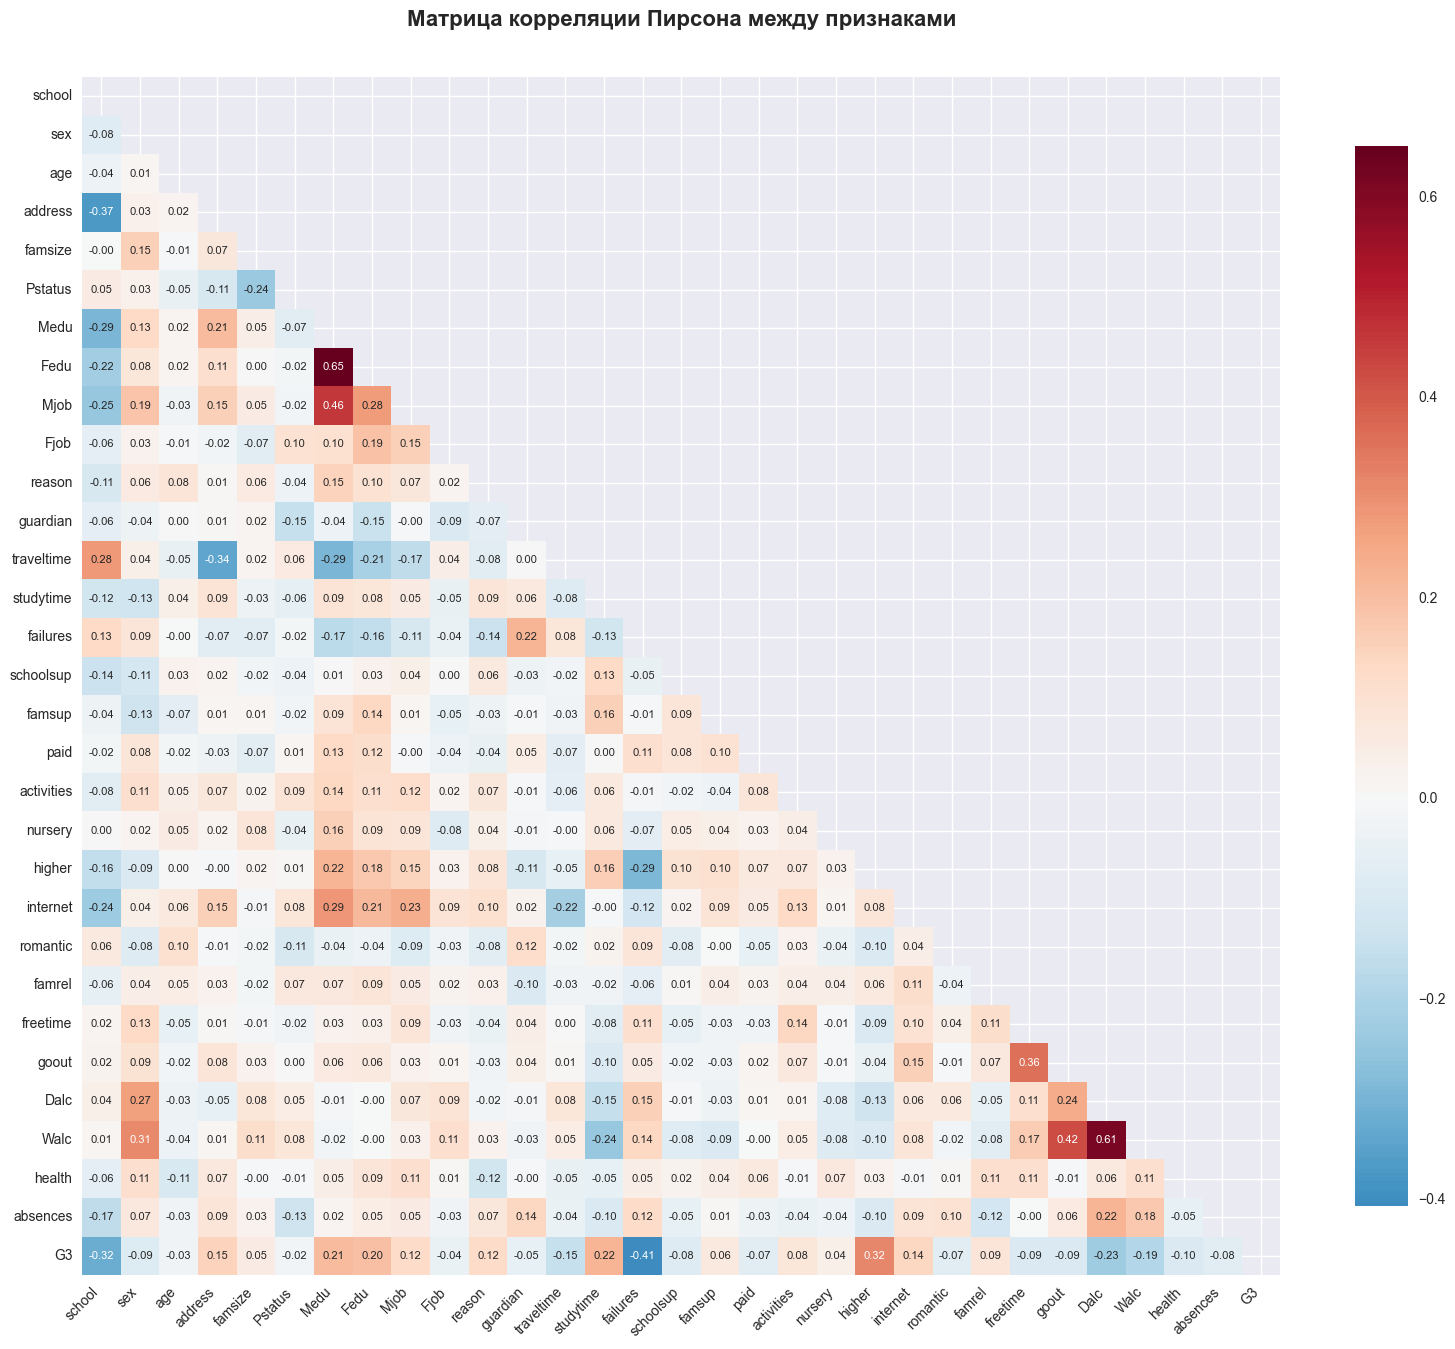

In [465]:
# Матрица корреляции Пирсона
plt.figure(figsize=(16, 14))
corr_matrix = df_encoded[numeric_columns].corr()

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Строим тепловую карту
sns.heatmap(
  corr_matrix,
  mask=mask,
  annot=True,
  cmap="RdBu_r",
  center=0,
  fmt=".2f",
  square=True,
  cbar_kws={"shrink": 0.8},
  annot_kws={"size": 8},
)

plt.title(
  "Матрица корреляции Пирсона между признаками\n", fontsize=16, fontweight="bold", pad=20
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

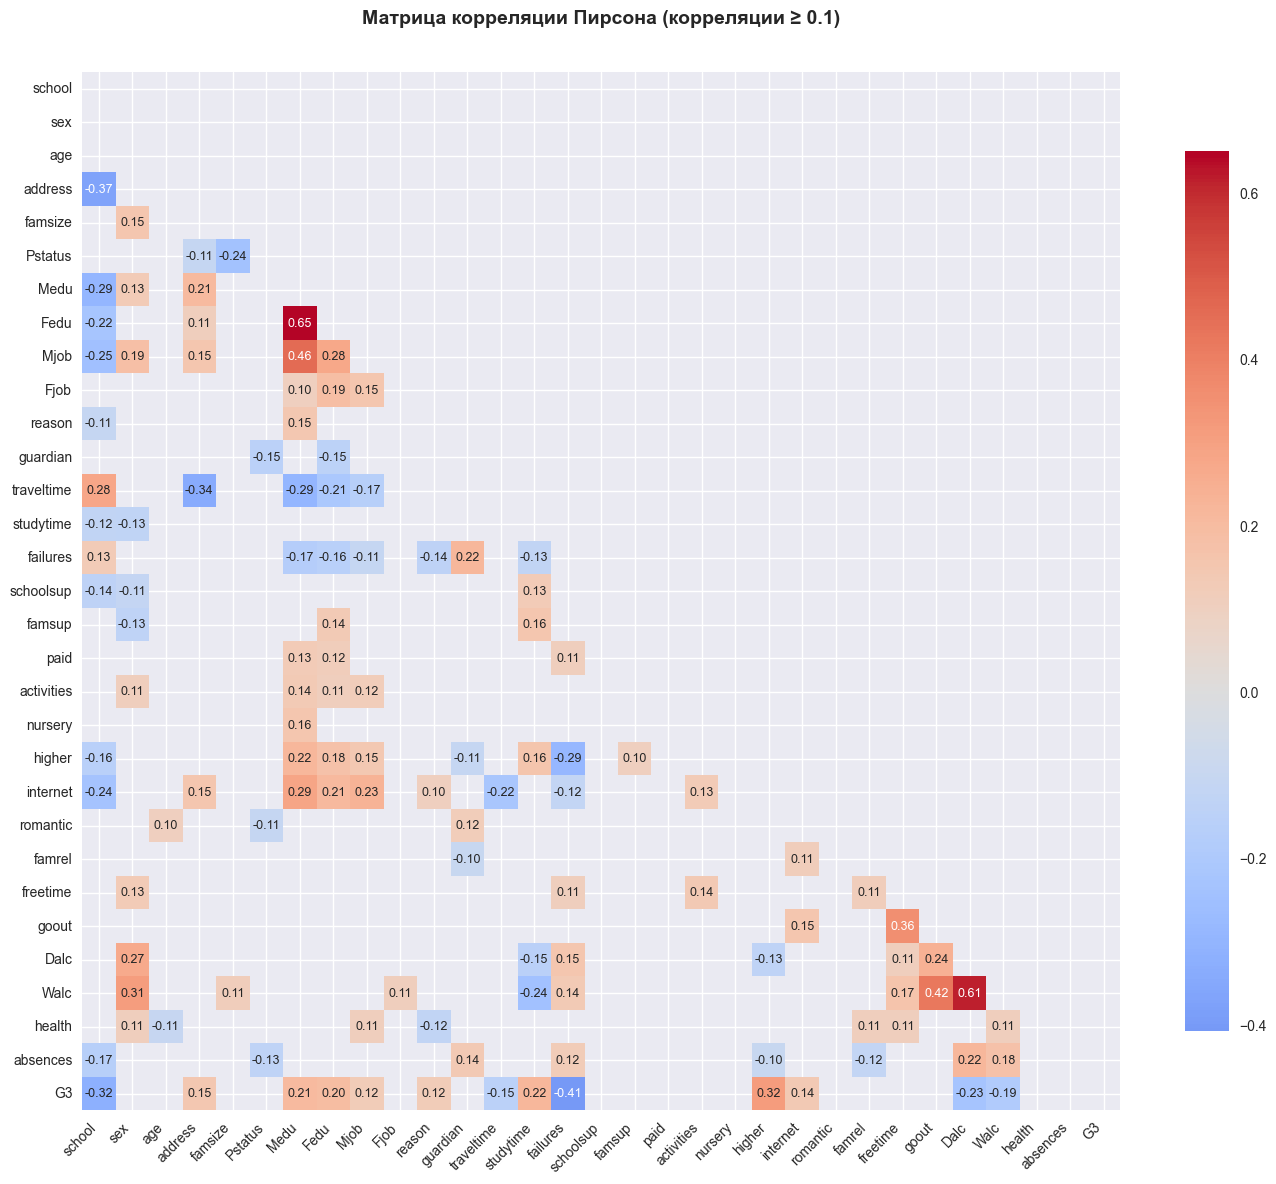

In [466]:
# Упрощенная матрица корреляции - только высокие корреляции
plt.figure(figsize=(14, 12))

# Создаем матрицу только с корреляциями выше порога
corr_threshold = 0.1
corr_matrix_filtered = corr_matrix[
  (corr_matrix.abs() >= corr_threshold) | (corr_matrix.index.isin(["G3"]))
]

# Убираем столбцы с NaN (все корреляции ниже порога)
corr_matrix_filtered = corr_matrix_filtered.dropna(axis=1, how="all")
corr_matrix_filtered = corr_matrix_filtered.dropna(axis=0, how="all")

mask = np.triu(np.ones_like(corr_matrix_filtered, dtype=bool))

sns.heatmap(
  corr_matrix_filtered,
  mask=mask,
  annot=True,
  cmap="coolwarm",
  center=0,
  fmt=".2f",
  square=True,
  cbar_kws={"shrink": 0.8},
  annot_kws={"size": 9},
)

plt.title(
  "Матрица корреляции Пирсона (корреляции ≥ 0.1)\n",
  fontsize=14,
  fontweight="bold",
  pad=20,
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

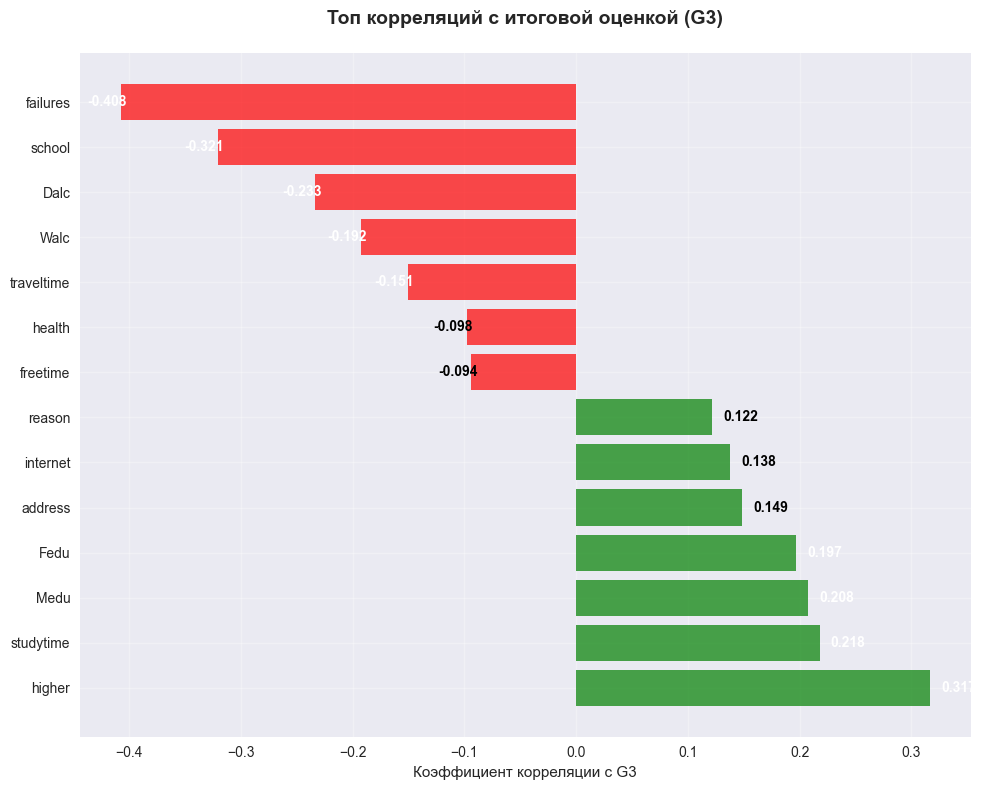

In [467]:
# Анализ корреляций с целевой переменной G3
plt.figure(figsize=(10, 8))

# Получаем корреляции с G3 и сортируем
g3_correlations = corr_matrix["G3"].sort_values(ascending=False)

# Отбираем топ-15 самых высоких корреляций (положительных и отрицательных)
top_correlations = pd.concat([g3_correlations.head(8), g3_correlations.tail(7)])
top_correlations = top_correlations[top_correlations.index != "G3"]  # Убираем сам G3

# Строим барплот
colors = ["green" if x > 0 else "red" for x in top_correlations.values]
plt.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_correlations)), top_correlations.index)
plt.xlabel("Коэффициент корреляции с G3")
plt.title("Топ корреляций с итоговой оценкой (G3)\n", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(top_correlations.values):
  plt.text(
    v + (0.01 if v > 0 else -0.03),
    i,
    f"{v:.3f}",
    va="center",
    fontweight="bold",
    color="black" if abs(v) < 0.15 else "white",
  )

plt.tight_layout()
plt.show()

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты


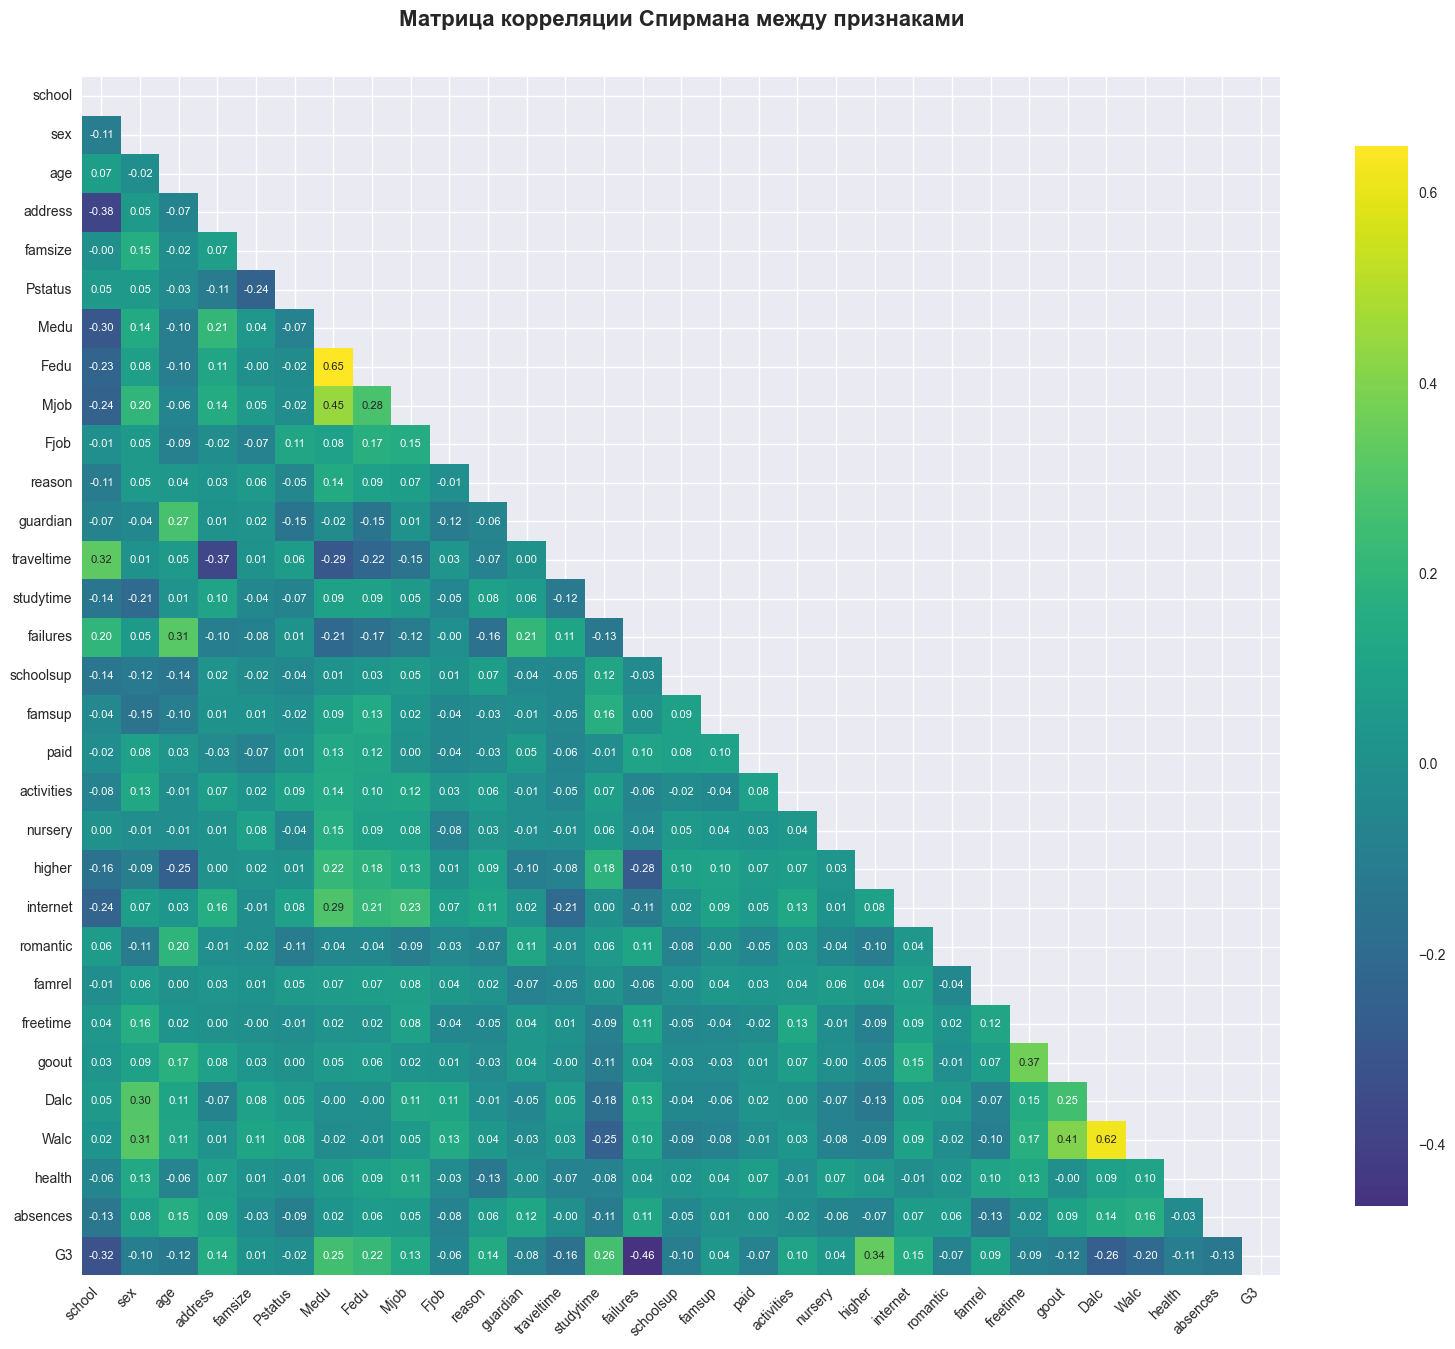

In [468]:
# Матрица корреляции Спирмана
plt.figure(figsize=(16, 14))
spearman_corr = df_encoded[numeric_columns].corr(method="spearman")

mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

sns.heatmap(
  spearman_corr,
  mask=mask,
  annot=True,
  cmap="viridis",
  center=0,
  fmt=".2f",
  square=True,
  cbar_kws={"shrink": 0.8},
  annot_kws={"size": 8},
)

plt.title(
  "Матрица корреляции Спирмана между признаками\n", fontsize=16, fontweight="bold", pad=20
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

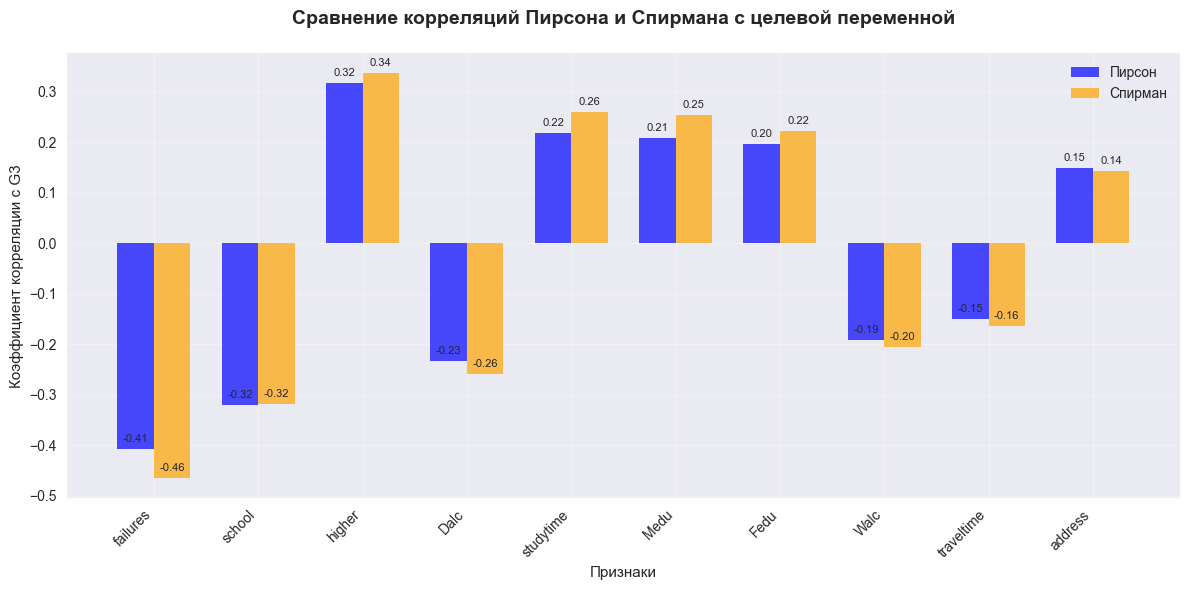

In [469]:
# Сравнение корреляций Пирсона и Спирмана для топ признаков
plt.figure(figsize=(12, 8))

# Берем топ-10 признаков по абсолютной корреляции с G3
top_features = corr_matrix["G3"].abs().sort_values(ascending=False).head(11)
top_features = top_features[top_features.index != "G3"].head(10)

# Создаем DataFrame для сравнения
comparison_df = pd.DataFrame(
  {
    "Feature": top_features.index,
    "Pearson": [corr_matrix.loc[feature, "G3"] for feature in top_features.index],
    "Spearman": [spearman_corr.loc[feature, "G3"] for feature in top_features.index],
  }
)

# Строим сравнение
x = np.arange(len(comparison_df))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(
  x - width / 2, comparison_df["Pearson"], width, label="Пирсон", alpha=0.7, color="blue"
)
bars2 = ax.bar(
  x + width / 2,
  comparison_df["Spearman"],
  width,
  label="Спирман",
  alpha=0.7,
  color="orange",
)

ax.set_xlabel("Признаки")
ax.set_ylabel("Коэффициент корреляции с G3")
ax.set_title(
  "Сравнение корреляций Пирсона и Спирмана с целевой переменной\n",
  fontsize=14,
  fontweight="bold",
)
ax.set_xticks(x)
ax.set_xticklabels(comparison_df["Feature"], rotation=45, ha="right")
ax.legend()
ax.grid(True, alpha=0.3)


# Добавляем значения на столбцы
def add_values(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
      bar.get_x() + bar.get_width() / 2.0,
      height + 0.01,
      f"{height:.2f}",
      ha="center",
      va="bottom",
      fontsize=8,
    )


add_values(bars1)
add_values(bars2)

plt.tight_layout()
plt.show()

In [470]:
# Статистический анализ корреляций
print("=" * 70)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ КОРРЕЛЯЦИЙ")
print("=" * 70)

# Анализ высоких корреляций
high_corr_threshold = 0.5
high_correlations = []

for i in range(len(corr_matrix.columns)):
  for j in range(i + 1, len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[i, j]) >= high_corr_threshold:
      high_correlations.append(
        {
          "Feature1": corr_matrix.columns[i],
          "Feature2": corr_matrix.columns[j],
          "Pearson": corr_matrix.iloc[i, j],
          "Spearman": spearman_corr.iloc[i, j],
        }
      )

high_corr_df = pd.DataFrame(high_correlations).sort_values(
  "Pearson", key=abs, ascending=False
)

print(f"\nВысокие корреляции (≥ {high_corr_threshold}):")
if len(high_corr_df) > 0:
  for _, row in high_corr_df.iterrows():
    print(f"  {row['Feature1']} ↔ {row['Feature2']}:")
    print(f"    Пирсон: {row['Pearson']:.3f}, Спирман: {row['Spearman']:.3f}")
else:
  print("  Нет очень высоких корреляций")

# Анализ корреляций с целевой переменной
print("\nКОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ G3:")
print("-" * 50)

strong_corr = g3_correlations[abs(g3_correlations) >= 0.3]
moderate_corr = g3_correlations[
  (abs(g3_correlations) >= 0.2) & (abs(g3_correlations) < 0.3)
]
weak_corr = g3_correlations[(abs(g3_correlations) >= 0.1) & (abs(g3_correlations) < 0.2)]

print("\nСильные корреляции (≥ 0.3):")
for feature, corr in strong_corr.items():
  if feature != "G3":
    print(f"  {feature}: {corr:.3f}")

print("\nУмеренные корреляции (0.2-0.3):")
for feature, corr in moderate_corr.items():
  if feature != "G3":
    print(f"  {feature}: {corr:.3f}")

print("\nСлабые корреляции (0.1-0.2):")
for feature, corr in weak_corr.items():
  if feature != "G3":
    print(f"  {feature}: {corr:.3f}")

СТАТИСТИЧЕСКИЙ АНАЛИЗ КОРРЕЛЯЦИЙ

Высокие корреляции (≥ 0.5):
  Medu ↔ Fedu:
    Пирсон: 0.650, Спирман: 0.649
  Dalc ↔ Walc:
    Пирсон: 0.613, Спирман: 0.619

КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ G3:
--------------------------------------------------

Сильные корреляции (≥ 0.3):
  higher: 0.317
  school: -0.321
  failures: -0.408

Умеренные корреляции (0.2-0.3):
  studytime: 0.218
  Medu: 0.208
  Dalc: -0.233

Слабые корреляции (0.1-0.2):
  Fedu: 0.197
  address: 0.149
  internet: 0.138
  reason: 0.122
  Mjob: 0.121
  traveltime: -0.151
  Walc: -0.192


## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.


In [471]:
df = X_train.copy()

# Анализ уникальных значений для каждого признака
unique_stats = []

for column in df.columns:
  unique_count = df[column].nunique()
  unique_values = df[column].unique()
  data_type = df[column].dtype
  missing_count = df[column].isna().sum()
  missing_percent = (missing_count / len(df)) * 100

  unique_stats.append(
    {
      "Признак": column,
      "Тип данных": data_type,
      "Уникальных значений": unique_count,
      "Пропущенных": missing_count,
      "Пропущенных %": round(missing_percent, 2),
      "Примеры значений": str(unique_values[:5])
      if unique_count > 5
      else str(unique_values),
    }
  )

# Создаем DataFrame со статистикой
stats_df = pd.DataFrame(unique_stats)
stats_df = stats_df.sort_values("Уникальных значений", ascending=False)

# Выводим подробную таблицу
print("\nПОДРОБНАЯ СТАТИСТИКА ПО УНИКАЛЬНЫМ ЗНАЧЕНИЯМ:")
print("-" * 100)
print(
  f"{'Признак':<20} {'Тип':<10} {'Уник.':<8} {'Пропуски':<10} {'%':<8} {'Примеры значений'}"
)
print("-" * 100)

for _, row in stats_df.iterrows():
  print(
    f"{row['Признак']:<20} {row['Тип данных']!s:<10} {row['Уникальных значений']:<8} "
    f"{row['Пропущенных']:<10} {row['Пропущенных %']:<8} {row['Примеры значений'][:50]}..."
  )


ПОДРОБНАЯ СТАТИСТИКА ПО УНИКАЛЬНЫМ ЗНАЧЕНИЯМ:
----------------------------------------------------------------------------------------------------
Признак              Тип        Уник.    Пропуски   %        Примеры значений
----------------------------------------------------------------------------------------------------
absences             int64      22       0          0.0      [ 0 16  4  8  2]...
G3                   int64      17       0          0.0      [ 9 12 13 11 14]...
age                  float64    16       28         6.17     [nan 15. 17. 20. 18.]...
sex                  object     6        0          0.0      ['M' 'F' 'D' 'C' 'B']...
Fjob                 object     5        0          0.0      ['services' 'other' 'at_home' 'teacher' 'health']...
Mjob                 object     5        0          0.0      ['at_home' 'teacher' 'other' 'services' 'health']...
Medu                 int64      5        0          0.0      [1 3 4 2 0]...
Dalc                 int64      5  

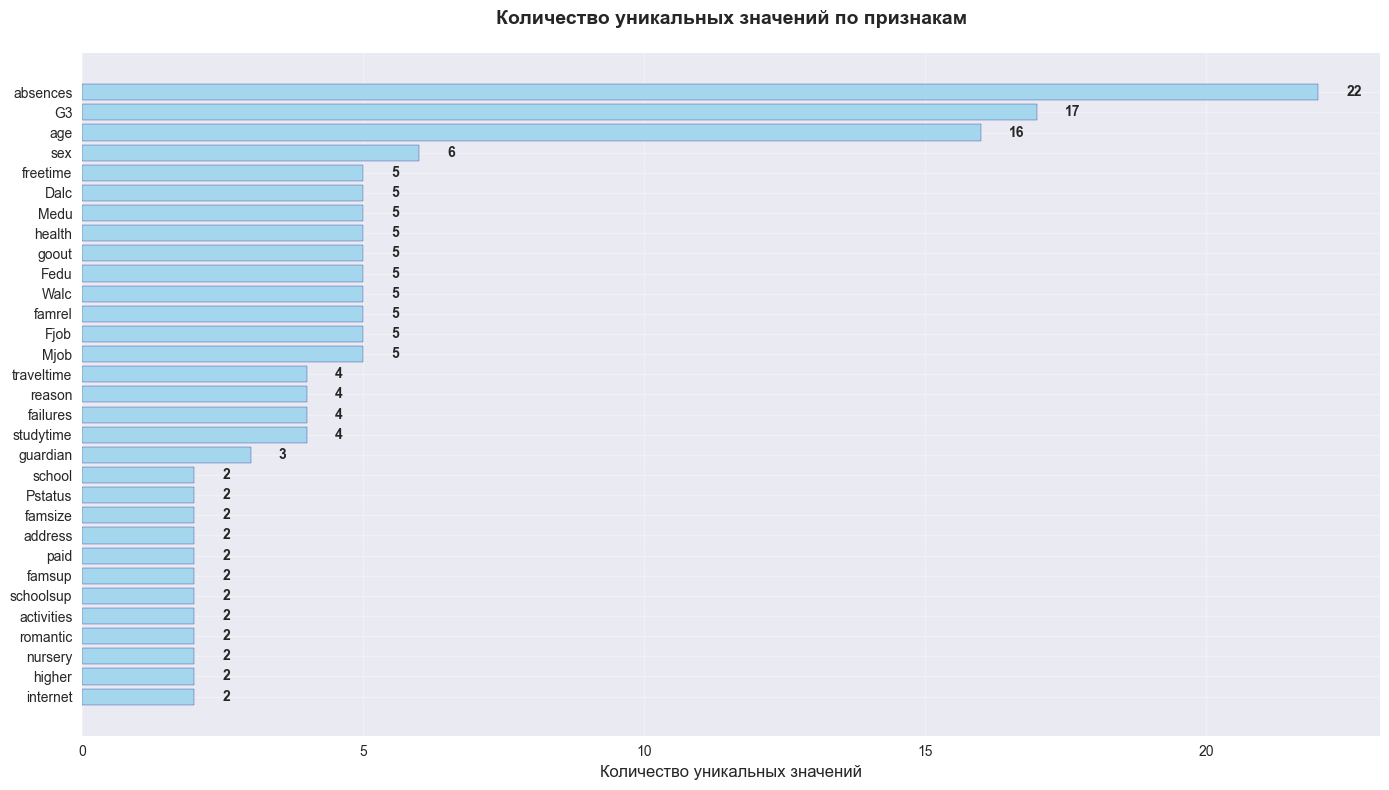

In [472]:
# Визуализация количества уникальных значений
plt.figure(figsize=(14, 8))

# Сортируем по количеству уникальных значений
sorted_stats = stats_df.sort_values("Уникальных значений", ascending=True)

# Создаем график
bars = plt.barh(
  sorted_stats["Признак"],
  sorted_stats["Уникальных значений"],
  color="skyblue",
  edgecolor="navy",
  alpha=0.7,
)

plt.xlabel("Количество уникальных значений", fontsize=12)
plt.title("Количество уникальных значений по признакам\n", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar in bars:
  width = bar.get_width()
  plt.text(
    width + 0.5,
    bar.get_y() + bar.get_height() / 2,
    f"{int(width)}",
    ha="left",
    va="center",
    fontweight="bold",
  )

plt.tight_layout()
plt.show()

In [473]:
# Классификация признаков по типам и количеству уникальных значений
print("\n" + "=" * 70)
print("КЛАССИФИКАЦИЯ ПРИЗНАКОВ")
print("=" * 70)

# Определяем категории
categorical_low = []  # 2-5 уникальных значений
categorical_medium = []  # 6-10 уникальных значений
categorical_high = []  # 11-20 уникальных значений
numerical_low = []  # 2-10 уникальных значений (дискретные)
numerical_high = []  # >20 уникальных значений (непрерывные)

for _, row in stats_df.iterrows():
  feature = row["Признак"]
  unique_count = row["Уникальных значений"]
  dtype = row["Тип данных"]

  if np.issubdtype(dtype, np.number):
    if unique_count <= 10:
      numerical_low.append((feature, unique_count))
    else:
      numerical_high.append((feature, unique_count))
  elif unique_count <= 5:
    categorical_low.append((feature, unique_count))
  elif unique_count <= 10:
    categorical_medium.append((feature, unique_count))
  else:
    categorical_high.append((feature, unique_count))

# Выводим классификацию
print("\nКАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ:")
print(f"  Низкая кардинальность (2-5 значений): {len(categorical_low)}")
for feature, count in categorical_low:
  print(f"    - {feature}: {count} уникальных значений")

print(f"\n  Средняя кардинальность (6-10 значений): {len(categorical_medium)}")
for feature, count in categorical_medium:
  print(f"    - {feature}: {count} уникальных значений")

print(f"\n  Высокая кардинальность (>10 значений): {len(categorical_high)}")
for feature, count in categorical_high:
  print(f"    - {feature}: {count} уникальных значений")

print("\nЧИСЛОВЫЕ ПРИЗНАКИ:")
print(f"  Дискретные (2-10 значений): {len(numerical_low)}")
for feature, count in numerical_low:
  print(f"    - {feature}: {count} уникальных значений")

print(f"\n  Непрерывные (>10 значений): {len(numerical_high)}")
for feature, count in numerical_high:
  print(f"    - {feature}: {count} уникальных значений")


КЛАССИФИКАЦИЯ ПРИЗНАКОВ

КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ:
  Низкая кардинальность (2-5 значений): 16
    - Fjob: 5 уникальных значений
    - Mjob: 5 уникальных значений
    - reason: 4 уникальных значений
    - guardian: 3 уникальных значений
    - school: 2 уникальных значений
    - address: 2 уникальных значений
    - famsize: 2 уникальных значений
    - Pstatus: 2 уникальных значений
    - romantic: 2 уникальных значений
    - internet: 2 уникальных значений
    - higher: 2 уникальных значений
    - nursery: 2 уникальных значений
    - activities: 2 уникальных значений
    - paid: 2 уникальных значений
    - famsup: 2 уникальных значений
    - schoolsup: 2 уникальных значений

  Средняя кардинальность (6-10 значений): 1
    - sex: 6 уникальных значений

  Высокая кардинальность (>10 значений): 0

ЧИСЛОВЫЕ ПРИЗНАКИ:
  Дискретные (2-10 значений): 11
    - Medu: 5 уникальных значений
    - Dalc: 5 уникальных значений
    - goout: 5 уникальных значений
    - famrel: 5 уникальных значений
    -

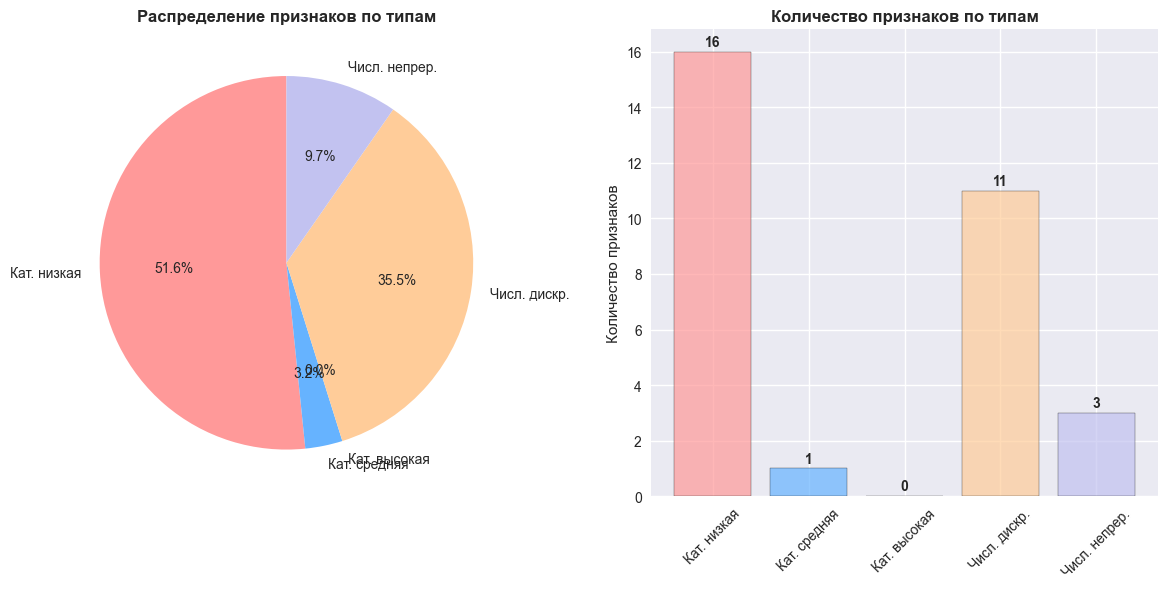

In [474]:
# Визуализация распределения признаков по категориям
categories = [
  "Кат. низкая",
  "Кат. средняя",
  "Кат. высокая",
  "Числ. дискр.",
  "Числ. непрер.",
]
counts = [
  len(categorical_low),
  len(categorical_medium),
  len(categorical_high),
  len(numerical_low),
  len(numerical_high),
]

plt.figure(figsize=(12, 6))

# Круговая диаграмма
plt.subplot(1, 2, 1)
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"]
plt.pie(counts, labels=categories, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Распределение признаков по типам", fontweight="bold")

# Столбчатая диаграмма
plt.subplot(1, 2, 2)
bars = plt.bar(categories, counts, color=colors, edgecolor="black", alpha=0.7)
plt.title("Количество признаков по типам", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Количество признаков")

# Добавляем значения на столбцы
for bar in bars:
  height = bar.get_height()
  plt.text(
    bar.get_x() + bar.get_width() / 2.0,
    height + 0.1,
    f"{int(height)}",
    ha="center",
    va="bottom",
    fontweight="bold",
  )

plt.tight_layout()
plt.show()

In [475]:
# Анализ аномалий в количестве уникальных значений
print("\n" + "=" * 70)
print("АНАЛИЗ АНОМАЛЬНЫХ СЛУЧАЕВ")
print("=" * 70)

# Признаки с очень малым количеством уникальных значений (возможно константы)
low_variance = stats_df[stats_df["Уникальных значений"] <= 2]
if not low_variance.empty:
  print("\nПРИЗНАКИ С ОЧЕНЬ МАЛЫМ КОЛИЧЕСТВОМ УНИКАЛЬНЫХ ЗНАЧЕНИЙ:")
  for _, row in low_variance.iterrows():
    print(f"  {row['Признак']}: {row['Уникальных значений']} уникальных значений")
    print(f"    Значения: {row['Примеры значений']}")

# Признаки с очень большим количеством уникальных значений
high_variance = stats_df[stats_df["Уникальных значений"] > 20]
if not high_variance.empty:
  print("\nПРИЗНАКИ С ОЧЕНЬ БОЛЬШИМ КОЛИЧЕСТВОМ УНИКАЛЬНЫХ ЗНАЧЕНИЙ:")
  for _, row in high_variance.iterrows():
    print(f"  {row['Признак']}: {row['Уникальных значений']} уникальных значений")

# Признаки с пропущенными значениями
missing_features = stats_df[stats_df["Пропущенных"] > 0]
if not missing_features.empty:
  print("\nПРИЗНАКИ С ПРОПУЩЕННЫМИ ЗНАЧЕНИЯМИ:")
  for _, row in missing_features.iterrows():
    print(f"  {row['Признак']}: {row['Пропущенных']} пропусков ({row['Пропущенных %']}%)")


АНАЛИЗ АНОМАЛЬНЫХ СЛУЧАЕВ

ПРИЗНАКИ С ОЧЕНЬ МАЛЫМ КОЛИЧЕСТВОМ УНИКАЛЬНЫХ ЗНАЧЕНИЙ:
  school: 2 уникальных значений
    Значения: ['MS' 'GP']
  address: 2 уникальных значений
    Значения: ['U' 'R' nan]
  famsize: 2 уникальных значений
    Значения: ['LE3' 'GT3']
  Pstatus: 2 уникальных значений
    Значения: ['T' 'A']
  romantic: 2 уникальных значений
    Значения: ['yes' 'no']
  internet: 2 уникальных значений
    Значения: ['yes' 'no']
  higher: 2 уникальных значений
    Значения: ['no' 'yes']
  nursery: 2 уникальных значений
    Значения: ['yes' 'no']
  activities: 2 уникальных значений
    Значения: ['no' 'yes']
  paid: 2 уникальных значений
    Значения: ['no' 'yes']
  famsup: 2 уникальных значений
    Значения: ['no' 'yes']
  schoolsup: 2 уникальных значений
    Значения: ['no' 'yes']

ПРИЗНАКИ С ОЧЕНЬ БОЛЬШИМ КОЛИЧЕСТВОМ УНИКАЛЬНЫХ ЗНАЧЕНИЙ:
  absences: 22 уникальных значений

ПРИЗНАКИ С ПРОПУЩЕННЫМИ ЗНАЧЕНИЯМИ:
  age: 28 пропусков (6.17%)
  address: 5 пропусков (1.1%)


In [476]:
# Детальный анализ распределения значений для топ-10 признаков по уникальности
print("\n" + "=" * 70)
print("ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ ЗНАЧЕНИЙ")
print("=" * 70)

top_10_variable = stats_df.head(10)

for _, row in top_10_variable.iterrows():
  feature = row["Признак"]
  unique_count = row["Уникальных значений"]

  print(f"\n{feature} (уникальных значений: {unique_count}):")

  if unique_count <= 20:  # Показываем все значения для признаков с малым количеством
    value_counts = df[feature].value_counts().head(10)
    for value, count in value_counts.items():
      percentage = (count / len(df)) * 100
      print(f"  {value}: {count} ({percentage:.1f}%)")
  # Для признаков с большим количеством значений показываем статистику
  elif np.issubdtype(df[feature].dtype, np.number):
    print(f"  Min: {df[feature].min()}, Max: {df[feature].max()}")
    print(f"  Mean: {df[feature].mean():.2f}, Std: {df[feature].std():.2f}")
  else:
    top_values = df[feature].value_counts().head(5)
    print("  Топ-5 самых частых значений:")
    for value, count in top_values.items():
      percentage = (count / len(df)) * 100
      print(f"    {value}: {count} ({percentage:.1f}%)")


ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ ЗНАЧЕНИЙ

absences (уникальных значений: 22):
  Min: 0, Max: 32
  Mean: 3.68, Std: 4.59

G3 (уникальных значений: 17):
  10: 70 (15.4%)
  11: 69 (15.2%)
  13: 60 (13.2%)
  14: 47 (10.4%)
  12: 47 (10.4%)
  15: 36 (7.9%)
  9: 26 (5.7%)
  8: 26 (5.7%)
  16: 23 (5.1%)
  17: 21 (4.6%)

age (уникальных значений: 16):
  17.0: 111 (24.4%)
  16.0: 111 (24.4%)
  18.0: 95 (20.9%)
  15.0: 73 (16.1%)
  19.0: 19 (4.2%)
  20.0: 6 (1.3%)
  21.0: 2 (0.4%)
  161.0: 1 (0.2%)
  181.0: 1 (0.2%)
  151.0: 1 (0.2%)

sex (уникальных значений: 6):
  F: 257 (56.6%)
  M: 189 (41.6%)
  D: 5 (1.1%)
  C: 1 (0.2%)
  B: 1 (0.2%)
  A: 1 (0.2%)

Fjob (уникальных значений: 5):
  other: 268 (59.0%)
  services: 127 (28.0%)
  at_home: 31 (6.8%)
  teacher: 16 (3.5%)
  health: 12 (2.6%)

Mjob (уникальных значений: 5):
  other: 188 (41.4%)
  at_home: 99 (21.8%)
  services: 94 (20.7%)
  teacher: 42 (9.3%)
  health: 31 (6.8%)

Medu (уникальных значений: 5):
  2: 128 (28.2%)
  4: 116 (25.6%)
  1: 

In [477]:
# Итоговая сводка
print("\n" + "=" * 70)
print("ИТОГОВАЯ СВОДКА")
print("=" * 70)

total_features = len(df.columns)
total_categorical = len(categorical_low) + len(categorical_medium) + len(categorical_high)
total_numerical = len(numerical_low) + len(numerical_high)

print(f"Всего признаков: {total_features}")
print(f"Категориальных признаков: {total_categorical}")
print(f"Числовых признаков: {total_numerical}")
print(f"Признаков с пропусками: {len(missing_features)}")
print(
  f"Среднее количество уникальных значений на признак: {stats_df['Уникальных значений'].mean():.1f}"
)
print(
  f"Медианное количество уникальных значений: {stats_df['Уникальных значений'].median():.1f}"
)


ИТОГОВАЯ СВОДКА
Всего признаков: 31
Категориальных признаков: 17
Числовых признаков: 14
Признаков с пропусками: 2
Среднее количество уникальных значений на признак: 5.0
Медианное количество уникальных значений: 4.0


## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме


In [478]:
df = X_train.copy()

print("=" * 60)
print("АНАЛИЗ СООТНОШЕНИЯ ПОЛОВ ДЛЯ СТУДЕНТОВ С ВЫСОКИМИ ОЦЕНКАМИ")
print("И ВРЕМЕНЕМ НА ДОРОГУ > 30 МИНУТ")
print("=" * 60)

print("Распределение итоговых оценок (G3):")
print(df["G3"].describe())

# Определяем порог для "самых высоких" оценок
# Возьмем 90-й перцентиль как критерий высоких оценок
high_grade_threshold = df["G3"].quantile(0.90)
print(f"\n90-й перцентиль оценок: {high_grade_threshold}")

# Также посмотрим на топ-10% оценок
top_10_percent = df["G3"].nlargest(int(len(df) * 0.1))
print(f"Минимальная оценка в топ-10%: {top_10_percent.min()}")

АНАЛИЗ СООТНОШЕНИЯ ПОЛОВ ДЛЯ СТУДЕНТОВ С ВЫСОКИМИ ОЦЕНКАМИ
И ВРЕМЕНЕМ НА ДОРОГУ > 30 МИНУТ
Распределение итоговых оценок (G3):
count    454.000000
mean      11.825991
std        3.185665
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

90-й перцентиль оценок: 16.0
Минимальная оценка в топ-10%: 16


In [479]:
# Фильтруем данные по условиям:
# 1. Время на дорогу > 30 минут (traveltime > 2, так как: 1-<15min, 2-15-30min, 3-30min-1h, 4->1h)
# 2. Высокие оценки (G3 >= 90-й перцентиль)

# Критерий для времени на дорогу
travel_time_threshold = 2  # > 30 минут

# Фильтруем данные
filtered_data = df[
  (df["traveltime"] > travel_time_threshold) & (df["G3"] >= high_grade_threshold)
].copy()

print(f"\nОБЩАЯ СТАТИСТИКА ФИЛЬТРАЦИИ:")
print(f"Всего студентов в датасете: {len(df)}")
print(
  f"Студентов с временем на дорогу > 30 мин: {len(df[df['traveltime'] > travel_time_threshold])}"
)
print(
  f"Студентов с высокими оценками (G3 ≥ {high_grade_threshold}): {len(df[df['G3'] >= high_grade_threshold])}"
)
print(f"Студентов, удовлетворяющих ОБОИМ условиям: {len(filtered_data)}")


ОБЩАЯ СТАТИСТИКА ФИЛЬТРАЦИИ:
Всего студентов в датасете: 454
Студентов с временем на дорогу > 30 мин: 52
Студентов с высокими оценками (G3 ≥ 16.0): 51
Студентов, удовлетворяющих ОБОИМ условиям: 4


In [480]:
# Анализ соотношения полов
if len(filtered_data) > 0:
  gender_distribution = filtered_data["sex"].value_counts()

  print("\nРАСПРЕДЕЛЕНИЕ ПО ПОЛУ В ОТФИЛЬТРОВАННОЙ ГРУППЕ:")
  print(f"Мужчины (M): {gender_distribution.get('M', 0)}")
  print(f"Женщины (F): {gender_distribution.get('F', 0)}")

  # Рассчитываем проценты
  total_filtered = len(filtered_data)
  male_percent = (gender_distribution.get("M", 0) / total_filtered) * 100
  female_percent = (gender_distribution.get("F", 0) / total_filtered) * 100

  print(f"Мужчины: {male_percent:.1f}%")
  print(f"Женщины: {female_percent:.1f}%")

else:
  print("Нет студентов, удовлетворяющих условиям. Попробуем снизить критерии.")

  # Альтернативный подход: используем топ-20% оценок
  high_grade_threshold_alt = df["G3"].quantile(0.80)
  print(f"\nПробуем с 80-м перцентилем: {high_grade_threshold_alt}")

  filtered_data = df[
    (df["traveltime"] > travel_time_threshold) & (df["G3"] >= high_grade_threshold_alt)
  ].copy()

  if len(filtered_data) > 0:
    gender_distribution = filtered_data["sex"].value_counts()
    total_filtered = len(filtered_data)
    male_percent = (gender_distribution.get("M", 0) / total_filtered) * 100
    female_percent = (gender_distribution.get("F", 0) / total_filtered) * 100

    print(f"Найдено студентов: {len(filtered_data)}")
    print(f"Мужчины: {gender_distribution.get('M', 0)} ({male_percent:.1f}%)")
    print(f"Женщины: {gender_distribution.get('F', 0)} ({female_percent:.1f}%)")
  else:
    print("Все еще нет данных. Используем минимальные критерии.")

    # Минимальные критерии: любые оценки выше медианы
    median_grade = df["G3"].median()
    filtered_data = df[
      (df["traveltime"] > travel_time_threshold) & (df["G3"] > median_grade)
    ].copy()

    gender_distribution = filtered_data["sex"].value_counts()
    total_filtered = len(filtered_data)
    male_percent = (gender_distribution.get("M", 0) / total_filtered) * 100
    female_percent = (gender_distribution.get("F", 0) / total_filtered) * 100

    print(f"Найдено студентов: {len(filtered_data)}")
    print(f"Мужчины: {gender_distribution.get('M', 0)} ({male_percent:.1f}%)")
    print(f"Женщины: {gender_distribution.get('F', 0)} ({female_percent:.1f}%)")


РАСПРЕДЕЛЕНИЕ ПО ПОЛУ В ОТФИЛЬТРОВАННОЙ ГРУППЕ:
Мужчины (M): 1
Женщины (F): 3
Мужчины: 25.0%
Женщины: 75.0%


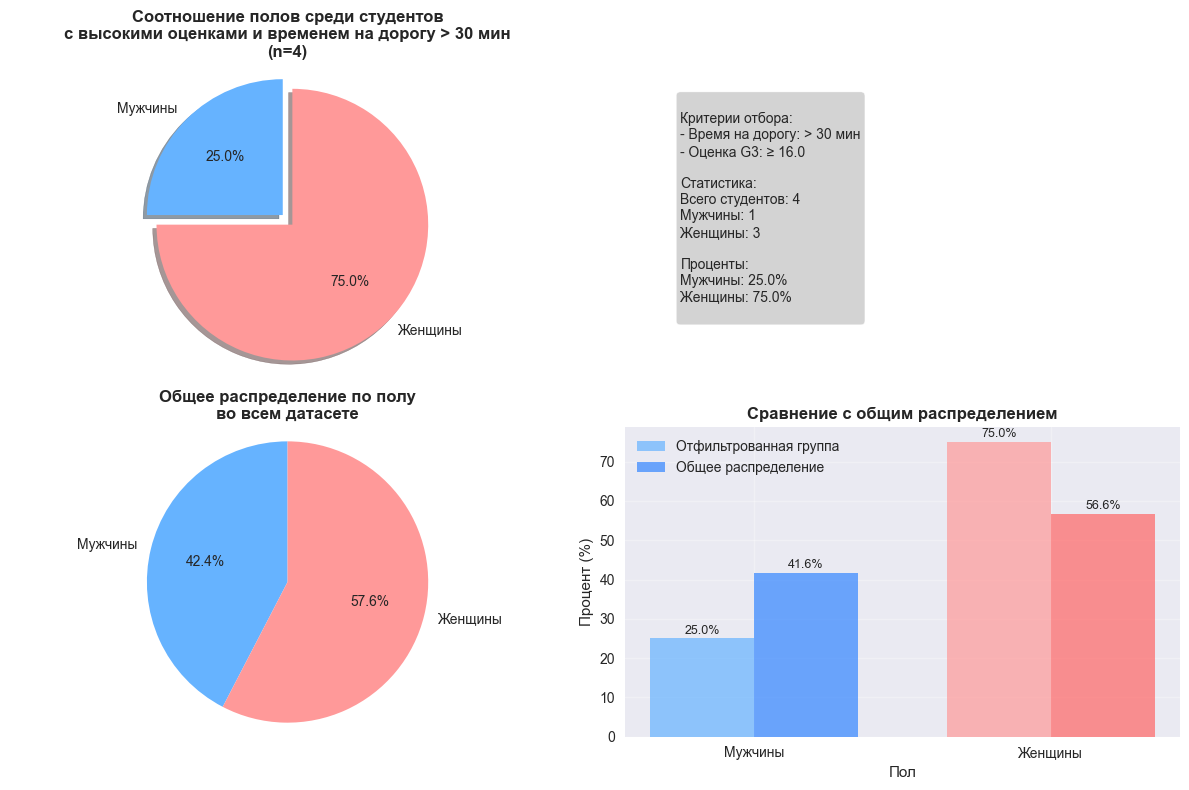

In [481]:
# Строим круговую диаграмму
plt.figure(figsize=(12, 8))

# Основная круговая диаграмма
plt.subplot(2, 2, 1)
if len(filtered_data) > 0:
  labels = ["Мужчины", "Женщины"]
  sizes = [gender_distribution.get("M", 0), gender_distribution.get("F", 0)]
  colors = ["#66b3ff", "#ff9999"]
  explode = (0.05, 0.05)  # Выделяем сектора

  plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
  )
  plt.axis("equal")
  plt.title(
    f"Соотношение полов среди студентов\nс высокими оценками и временем на дорогу > 30 мин\n(n={len(filtered_data)})",
    fontweight="bold",
    fontsize=12,
  )
else:
  plt.text(
    0.5,
    0.5,
    "Нет данных\nудовлетворяющих условиям",
    ha="center",
    va="center",
    fontsize=14,
    transform=plt.gca().transAxes,
  )
  plt.title("Нет данных для визуализации", fontweight="bold")

# Дополнительная информация
plt.subplot(2, 2, 2)
# Показываем детальную статистику
stats_text = f"""
Критерии отбора:
- Время на дорогу: > 30 мин
- Оценка G3: ≥ {high_grade_threshold if len(filtered_data) > 0 else high_grade_threshold_alt}

Статистика:
Всего студентов: {len(filtered_data)}
Мужчины: {gender_distribution.get("M", 0)}
Женщины: {gender_distribution.get("F", 0)}

Проценты:
Мужчины: {male_percent:.1f}%
Женщины: {female_percent:.1f}%
"""
plt.text(
  0.1,
  0.9,
  stats_text,
  fontsize=10,
  verticalalignment="top",
  bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"),
)
plt.axis("off")

# Сравнение с общим распределением
plt.subplot(2, 2, 3)
# Общее распределение по полу во всем датасете
overall_gender = df["sex"].value_counts()
overall_sizes = [overall_gender.get("M", 0), overall_gender.get("F", 0)]
overall_total = len(df)
overall_male_percent = (overall_gender.get("M", 0) / overall_total) * 100
overall_female_percent = (overall_gender.get("F", 0) / overall_total) * 100

plt.pie(overall_sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Общее распределение по полу\nво всем датасете", fontweight="bold")

# Столбчатая диаграмма для сравнения
plt.subplot(2, 2, 4)
categories = ["Мужчины", "Женщины"]
filtered_percents = [male_percent, female_percent]
overall_percents = [overall_male_percent, overall_female_percent]

x = np.arange(len(categories))
width = 0.35

bars1 = plt.bar(
  x - width / 2,
  filtered_percents,
  width,
  label="Отфильтрованная группа",
  color=["#66b3ff", "#ff9999"],
  alpha=0.7,
)
bars2 = plt.bar(
  x + width / 2,
  overall_percents,
  width,
  label="Общее распределение",
  color=["#3385ff", "#ff6666"],
  alpha=0.7,
)

plt.xlabel("Пол")
plt.ylabel("Процент (%)")
plt.title("Сравнение с общим распределением", fontweight="bold")
plt.xticks(x, categories)
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
  for bar in bars:
    height = bar.get_height()
    plt.text(
      bar.get_x() + bar.get_width() / 2.0,
      height + 0.5,
      f"{height:.1f}%",
      ha="center",
      va="bottom",
      fontsize=9,
    )

plt.tight_layout()
plt.show()

In [482]:
# Детальный анализ отфильтрованной группы
if len(filtered_data) > 0:
  print("\n" + "=" * 60)
  print("ДЕТАЛЬНЫЙ АНАЛИЗ ОТФИЛЬТРОВАННОЙ ГРУППЫ")
  print("=" * 60)

  print("\nСРЕДНИЕ ПОКАЗАТЕЛИ ОТФИЛЬТРОВАННОЙ ГРУППЫ:")
  print(f"Средняя оценка G3: {filtered_data['G3'].mean():.2f}")
  print(f"Среднее время на дорогу: {filtered_data['traveltime'].mean():.2f}")
  print(f"Средний возраст: {filtered_data['age'].mean():.2f}")

  print("\nРАСПРЕДЕЛЕНИЕ ПО ШКОЛАМ:")
  school_dist = filtered_data["school"].value_counts()
  for school, count in school_dist.items():
    print(f"  {school}: {count} студентов")

  print("\nРАСПРЕДЕЛЕНИЕ ПО АДРЕСУ:")
  address_dist = filtered_data["address"].value_counts()
  for address, count in address_dist.items():
    address_name = "Городской" if address == "U" else "Сельский"
    print(f"  {address_name}: {count} студентов")

# Анализ разницы в оценках между полами в отфильтрованной группе
if (
  len(filtered_data) > 0
  and "M" in filtered_data["sex"].to_numpy()
  and "F" in filtered_data["sex"].to_numpy()
):
  male_grades = filtered_data[filtered_data["sex"] == "M"]["G3"]
  female_grades = filtered_data[filtered_data["sex"] == "F"]["G3"]

  print("\nСРАВНЕНИЕ ОЦЕНОК ПО ПОЛУ В ОТФИЛЬТРОВАННОЙ ГРУППЕ:")
  print(f"Средняя оценка мужчин: {male_grades.mean():.2f}")
  print(f"Средняя оценка женщин: {female_grades.mean():.2f}")
  print(f"Максимальная оценка мужчин: {male_grades.max()}")
  print(f"Максимальная оценка женщин: {female_grades.max()}")


ДЕТАЛЬНЫЙ АНАЛИЗ ОТФИЛЬТРОВАННОЙ ГРУППЫ

СРЕДНИЕ ПОКАЗАТЕЛИ ОТФИЛЬТРОВАННОЙ ГРУППЫ:
Средняя оценка G3: 16.50
Среднее время на дорогу: 3.25
Средний возраст: 16.00

РАСПРЕДЕЛЕНИЕ ПО ШКОЛАМ:
  GP: 2 студентов
  MS: 2 студентов

РАСПРЕДЕЛЕНИЕ ПО АДРЕСУ:
  Городской: 2 студентов
  Сельский: 2 студентов

СРАВНЕНИЕ ОЦЕНОК ПО ПОЛУ В ОТФИЛЬТРОВАННОЙ ГРУППЕ:
Средняя оценка мужчин: 16.00
Средняя оценка женщин: 16.67
Максимальная оценка мужчин: 16
Максимальная оценка женщин: 18


## Построить boxplot для оценок по возрасту.


In [483]:
df = X_train.copy()

print("=" * 60)
print("BOXPLOT ДЛЯ ОЦЕНОК ПО ВОЗРАСТУ")
print("=" * 60)

# Анализ возраста и оценок
print("СТАТИСТИКА ПО ВОЗРАСТУ:")
print(df["age"].describe())

print("\nСТАТИСТИКА ПО ОЦЕНКАМ (G3):")
print(df["G3"].describe())

# Проверяем наличие пропусков
print("\nПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print(f"Возраст: {df['age'].isnull().sum()} пропусков")
print(f"Оценки G3: {df['G3'].isnull().sum()} пропусков")

# Удаляем строки с пропущенными значениями возраста для анализа
df_clean = df.dropna(subset=["age"]).copy()
print(f"\nДанных для анализа: {len(df_clean)} записей")

# Анализ распределения студентов по возрастам
age_distribution = df_clean["age"].value_counts().sort_index()
print("\nРАСПРЕДЕЛЕНИЕ СТУДЕНТОВ ПО ВОЗРАСТУ:")
for age, count in age_distribution.items():
  percentage = (count / len(df_clean)) * 100
  print(f"Возраст {age}: {count} студентов ({percentage:.1f}%)")

BOXPLOT ДЛЯ ОЦЕНОК ПО ВОЗРАСТУ
СТАТИСТИКА ПО ВОЗРАСТУ:
count    426.000000
mean      17.922535
std       13.417850
min       -1.000000
25%       16.000000
50%       17.000000
75%       18.000000
max      181.000000
Name: age, dtype: float64

СТАТИСТИКА ПО ОЦЕНКАМ (G3):
count    454.000000
mean      11.825991
std        3.185665
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
Возраст: 28 пропусков
Оценки G3: 0 пропусков

Данных для анализа: 426 записей

РАСПРЕДЕЛЕНИЕ СТУДЕНТОВ ПО ВОЗРАСТУ:
Возраст -1.0: 1 студентов (0.2%)
Возраст 1.0: 1 студентов (0.2%)
Возраст 5.0: 1 студентов (0.2%)
Возраст 8.0: 1 студентов (0.2%)
Возраст 15.0: 73 студентов (17.1%)
Возраст 16.0: 111 студентов (26.1%)
Возраст 17.0: 111 студентов (26.1%)
Возраст 18.0: 95 студентов (22.3%)
Возраст 19.0: 19 студентов (4.5%)
Возраст 20.0: 6 студентов (1.4%)
Возраст 21.0: 2 студентов (0.5%)
Возраст 22.0: 1 студентов (0.2%)
Во

C:\Users\dmitr\AppData\Local\Temp\ipykernel_1228\2018889642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="age", y="G3", palette="viridis", width=0.7)


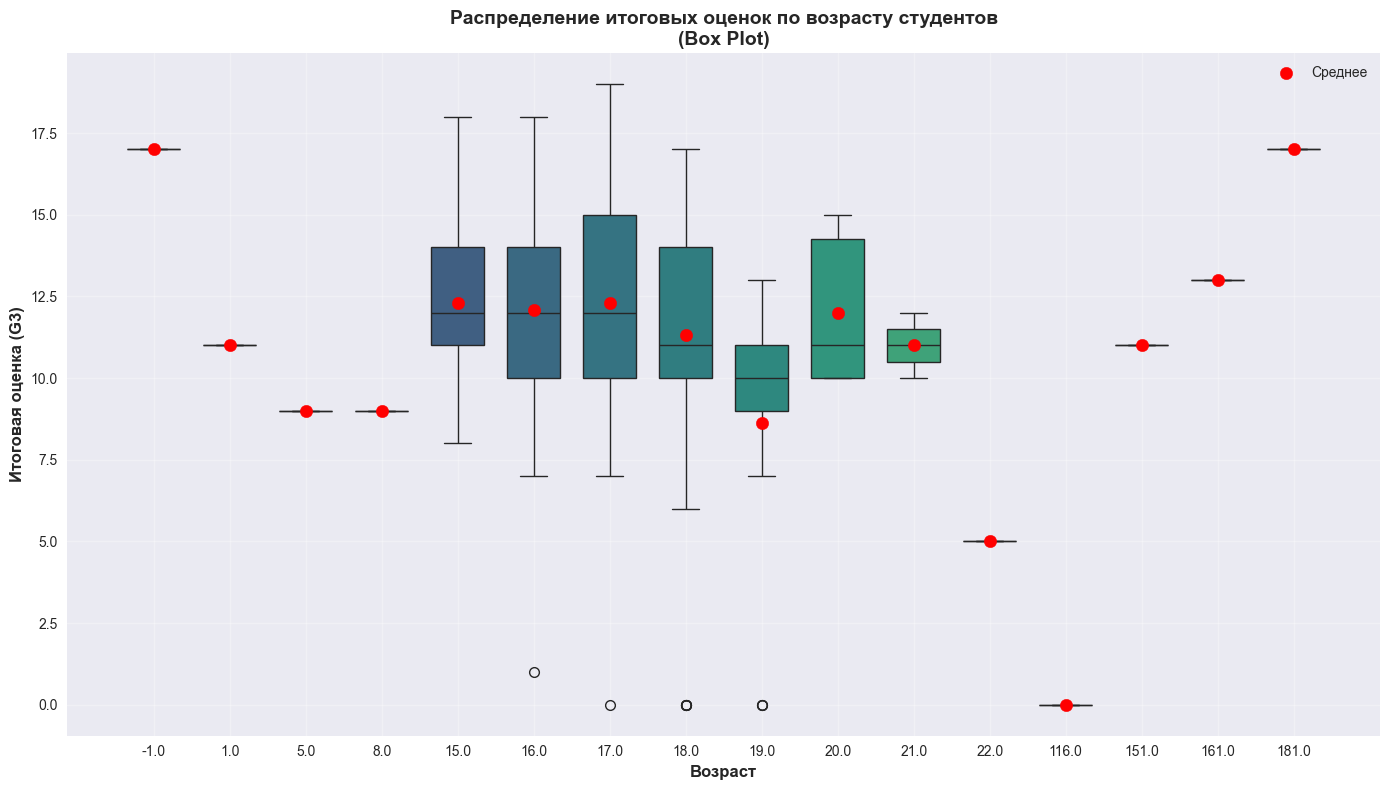

In [484]:
# Основной boxplot для оценок по возрасту
plt.figure(figsize=(14, 8))

# Boxplot с помощью seaborn
sns.boxplot(data=df_clean, x="age", y="G3", palette="viridis", width=0.7)

plt.xlabel("Возраст", fontsize=12, fontweight="bold")
plt.ylabel("Итоговая оценка (G3)", fontsize=12, fontweight="bold")
plt.title(
  "Распределение итоговых оценок по возрасту студентов\n(Box Plot)",
  fontsize=14,
  fontweight="bold",
)
plt.grid(True, alpha=0.3)

# Добавляем средние значения
age_means = df_clean.groupby("age")["G3"].mean()
for i, age in enumerate(age_means.index):
  plt.scatter(
    i, age_means[age], color="red", s=80, zorder=5, label="Среднее" if i == 0 else ""
  )

plt.legend()
plt.tight_layout()
plt.show()

## Найти id топ-5 самых юных отличников.


In [485]:
X_train[X_train["G3"] >= 17].sort_values(["age"], ascending=True).sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
143,GP,F,18.0,U,LE3,T,4,2,teacher,other,...,yes,no,4,2,2,1,1,3,0,17
25,GP,F,18.0,U,GT3,T,4,3,other,other,...,yes,yes,4,3,4,1,1,5,2,17
175,GP,F,17.0,U,GT3,A,4,3,services,services,...,yes,yes,5,2,2,1,2,5,14,17
51,MS,M,18.0,U,LE3,T,4,4,services,other,...,yes,no,5,4,5,1,1,5,3,17
117,GP,F,17.0,R,GT3,T,4,4,teacher,teacher,...,yes,no,4,4,4,1,1,5,2,17


## Для каждого возраста найдите максимальную и минимальную оценку (G3)


In [486]:
print("Минимальная оценка")
X_train[["age", "G3"]].groupby(["age"]).min().T

Минимальная оценка


age,-1.0,1.0,5.0,8.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,116.0,151.0,161.0,181.0
G3,17,11,9,9,8,1,0,0,0,10,10,5,0,11,13,17


In [487]:
print("Максимальная оценка")
X_train[["age", "G3"]].groupby(["age"]).max().T

Максимальная оценка


age,-1.0,1.0,5.0,8.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,116.0,151.0,161.0,181.0
G3,17,11,9,9,18,18,19,17,13,15,12,5,0,11,13,17


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.


In [488]:
valid_ranges = {
  "school": ["GP", "MS"],
  "sex": ["F", "M"],
  "age": lambda x: 15 <= x <= 22,
  "address": ["U", "R"],
  "famsize": ["LE3", "GT3"],
  "Pstatus": ["T", "A"],
  "Medu": [0, 1, 2, 3, 4],
  "Fedu": [0, 1, 2, 3, 4],
  "Mjob": ["teacher", "health", "services", "at_home", "other"],
  "Fjob": ["teacher", "health", "services", "at_home", "other"],
  "reason": ["home", "reputation", "course", "other"],
  "guardian": ["mother", "father", "other"],
  "traveltime": [1, 2, 3, 4],
  "studytime": [1, 2, 3, 4],
  "failures": lambda x: 0 <= x <= 4,
  "schoolsup": ["yes", "no"],
  "famsup": ["yes", "no"],
  "paid": ["yes", "no"],
  "activities": ["yes", "no"],
  "nursery": ["yes", "no"],
  "higher": ["yes", "no"],
  "internet": ["yes", "no"],
  "romantic": ["yes", "no"],
  "famrel": [1, 2, 3, 4, 5],
  "freetime": [1, 2, 3, 4, 5],
  "goout": [1, 2, 3, 4, 5],
  "Dalc": [1, 2, 3, 4, 5],
  "Walc": [1, 2, 3, 4, 5],
  "health": [1, 2, 3, 4, 5],
  "absences": lambda x: 0 <= x <= 93,
}

## Найдите и исправьте ошибки в данных


In [489]:
wrong_vals = {}
for column, valid_values in valid_ranges.items():
  if column in X_train.columns:
    if callable(valid_values):
      mask = ~X_train[column].apply(valid_values)
    else:
      mask = ~X_train[column].isin(valid_values)
    wrong_vals[column] = (mask | X_train[column].isna()).sum()
wrong_vals = pd.DataFrame({"incorrect_values": wrong_vals})
print(
  wrong_vals.sort_values("incorrect_values", ascending=False)[
    wrong_vals["incorrect_values"] != 0
  ]
)

male = X_train[X_train["sex"] == "M"].shape[0]
female = X_train[X_train["sex"] == "F"].shape[0]

         incorrect_values
age                    36
sex                     8
address                 5


C:\Users\dmitr\AppData\Local\Temp\ipykernel_1228\1363209813.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wrong_vals.sort_values("incorrect_values", ascending=False)[


## Удалите скоррелированные данные


In [490]:
to_replace = np.random.choice(
  ["M", "F"],
  p=[male / (male + female), female / (male + female)],
  size=wrong_vals.loc["sex", "incorrect_values"],
)
X_train.loc[~X_train["sex"].isin(valid_ranges["sex"]), "sex"] = to_replace

X_train.loc[~X_train["age"].apply(valid_ranges["age"]), "age"] = [
  X_train["age"].mean() for _ in range(wrong_vals.loc["age", "incorrect_values"])
]

u_addr = (X_train["address"] == "U").sum()
r_addr = (X_train["address"] == "R").sum()
total_addr = u_addr + r_addr
X_train.loc[~X_train["address"].isin(valid_ranges["address"]), "address"] = (
  np.random.choice(
    ["U", "R"],
    p=[u_addr / total_addr, r_addr / total_addr],
    size=wrong_vals.loc["address", "incorrect_values"],
  )
)

## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.


In [491]:
def stress_index(df):
  paid_numeric = df["paid"]
  schoolsup_numeric = df["schoolsup"]
  # Создаем индекс стресса, учитывая взаимодействие времени учебы и количество неудач, наличие работы и поддержки в школе
  stress_index = (
    df["studytime"] * (df["failures"] + 1) + paid_numeric * 2 - schoolsup_numeric
  )
  return stress_index


def alcohol_risk(df):
  sex_numeric = df["sex"]
  paid_numeric = df["paid"]
  # Создаем индекс риска алкоголизма, учитывая взаимодействие синергий возраста и социальной активности и работы и социальной активности и гендер и здоровье
  risk_profile = (
    np.sqrt(df["age"] - 15) * df["goout"]
    + sex_numeric * 0.8
    + paid_numeric * df["goout"] * 0.5
    - df["health"] * 0.3
  )
  print(risk_profile)
  return risk_profile


X_base = df_encoded.copy()
# t = stress_index(df_encoded)
X_base["stress"] = stress_index(df_encoded)
X_base["alcohol"] = alcohol_risk(df_encoded)

0            NaN
1            NaN
2       2.500000
3      12.971068
4      10.808204
         ...    
449     3.100000
450     2.300000
451     5.500000
452     2.000000
453     4.000000
Length: 454, dtype: float64


c:\UL\Programs\Python\semesters\5\machine_learning\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:

- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit


In [492]:
from sklearn.metrics import (
  accuracy_score,
  classification_report,
  f1_score,
  mean_absolute_error,
  mean_squared_error,
  r2_score,
)
from sklearn.model_selection import (
  GroupKFold,
  StratifiedKFold,
  cross_val_score,
  cross_validate,
)


## Разделите данные и объясните выбор стратегии


In [493]:
X = X_base.drop("G3", axis=1)
y = X_base["G3"]

X_base["school"]

0      1
1      0
2      0
3      1
4      0
      ..
449    0
450    0
451    0
452    1
453    0
Name: school, Length: 454, dtype: int64

In [494]:
fold_groups = GroupKFold(n_splits=2)
fold = StratifiedKFold(n_splits=2)

X = X_base.drop("G3", axis=1)
y = X_base["G3"]

grouped_fold = list(fold_groups.split(X=X, y=y, groups=X_base["school"]))
ungrouped_fold = list(fold.split(X=X, y=y))

c:\UL\Programs\Python\semesters\5\machine_learning\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


**Ваш ответ:** Рассмотрим два разных подхода к валидации модели предсказания оценок студентов, чтобы сравнить, насколько хорошо модель работает при тестировании на совершенно новых школах (GroupKFold) против случайного разделения всех студентов (StratifiedKFold). Первый будет актуален, тк данные образуют 2 группы студентов из разных школ, и будет правильно рассмотреть их в отдельности. Но если мы хотим получить стабильную оценку качества на несбалансированных данных, будет лучше использовать второй метод


# Часть 4. Заполнение пропусков в данных


## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите `NaN`.


In [495]:
for fold_num, (train_idx, test_idx) in enumerate(grouped_fold):
  train_data, test_data = X.iloc[train_idx], y.iloc[test_idx]
  print(
    f"\nFold {fold_num + 1} | Train: {len(train_data)} samples | Test: {len(test_data)} samples"
  )
  print(f"Schools: {train_data['school'].value_counts().to_dict()}")
  wrong = {}
  for column, valid_values in valid_ranges.items():
    if column in X_train.columns:
      if callable(valid_values):
        mask = ~X_train[column].apply(valid_values)
      else:
        mask = ~X_train[column].isin(valid_values)
      wrong[column] = (mask | train_data[column].isna()).sum()
  wrong_vals = pd.DataFrame({"incorrect_values": wrong}).sort_values(
    "incorrect_values", ascending=False
  )
  print(
    "Incorrect data:",
    "-"
    if wrong_vals[wrong_vals["incorrect_values"] != 0].empty
    else wrong_vals[wrong_vals["incorrect_values"] != 0],
  )

for fold_num, (train_idx, test_idx) in enumerate(ungrouped_fold):
  train_data, X_base = X.iloc[train_idx], y.iloc[test_idx]
  print(
    f"\nFold {fold_num + 1} | Train: {len(train_data)} samples | Test: {len(X_base)} samples"
  )
  print(f"Schools: {train_data['school'].value_counts().to_dict()}")

  wrong = {}
  for column, valid_values in valid_ranges.items():
    if column in X_train.columns:
      if callable(valid_values):
        mask = ~X_train[column].apply(valid_values)
      else:
        mask = ~X_train[column].isin(valid_values)

      wrong[column] = (mask | train_data[column].isna()).sum()
  wrong_vals = pd.DataFrame({"incorrect_values": wrong}).sort_values(
    "incorrect_values", ascending=False
  )
  print(
    "Incorrect data:",
    "-"
    if wrong_vals[wrong_vals["incorrect_values"] != 0].empty
    else wrong_vals[wrong_vals["incorrect_values"] != 0],
  )


Fold 1 | Train: 166 samples | Test: 288 samples
Schools: {1: 166}


Incorrect data:      incorrect_values
age                 6

Fold 2 | Train: 288 samples | Test: 166 samples
Schools: {0: 288}
Incorrect data:      incorrect_values
age                22

Fold 1 | Train: 227 samples | Test: 227 samples
Schools: {0: 140, 1: 87}
Incorrect data:      incorrect_values
age                13

Fold 2 | Train: 227 samples | Test: 227 samples
Schools: {0: 148, 1: 79}
Incorrect data:      incorrect_values
age                15


# Часть 5. Обучение алгоритма


In [496]:
def get_metrics(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return {
    "mse": mse,
    "rmse": np.sqrt(mse),
    "mae": mean_absolute_error(y_true, y_pred),
    "r2": r2_score(y_true, y_pred),
  }


def visualize(true_values, predicted, label=""):
  plt.figure(figsize=(18, 8))
  plt.plot(np.arange(len(predicted)), predicted, "^-", label=label)
  plt.plot(np.arange(len(predicted)), true_values, "*-", label="True values")
  plt.title(label)
  plt.legend()
  plt.grid(True)

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.


## KNN


In [497]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def run_knn(folded, k=10):
  pipeline = Pipeline(
    [("scaler", StandardScaler()), ("model", KNeighborsRegressor(n_neighbors=k))]
  )
  pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
  predicted = pipeline.predict(X.iloc[folded[1][1]])
  true_values = y.iloc[folded[1][1]]
  metrics = get_metrics(true_values, predicted)
  return pipeline, predicted, true_values, metrics


best_r2 = ({"r2": -100}, None)
for k in range(2, 30):
  pipeline, predicted, true_values, metrics = run_knn(grouped_fold, k=k)
  if metrics["r2"] > best_r2[0]["r2"]:
    best_r2 = (metrics, (predicted, true_values, k))
print(best_r2[0])
print(
  visualize(best_r2[1][1], best_r2[1][0], f"Grouped KNN regression k={best_r2[1][2]}")
)
predicted_knn = [best_r2[1][0]]
knn_metric_params = [(best_r2[0]["r2"], pipeline)]

best_r2 = ({"r2": -100}, None)
for k in range(2, 30):
  pipeline, predicted, true_values, metrics = run_knn(ungrouped_fold, k=k)
  if metrics["r2"] > best_r2[0]["r2"]:
    best_r2 = (metrics, (predicted, true_values, k))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Ungrouped KNN regression k={best_r2[1][2]}")
predicted_knn.append(best_r2[1][0])
knn_metric_params.append((best_r2[0]["r2"], pipeline))

ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Bayes


In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import RobustScaler


def run_bss(folded, alpha_1, alpha_2):
  pipeline = Pipeline(
    [
      ("scaler", RobustScaler()),
      ("model", BayesianRidge(alpha_1=alpha_1, alpha_2=alpha_2)),
    ]
  )
  pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
  predicted = pipeline.predict(X.iloc[folded[1][1]])
  true_values = y.iloc[folded[1][1]]
  metrics = get_metrics(true_values, predicted)
  return pipeline, predicted, true_values, metrics


best_r2 = ({"r2": -100}, None)
for alpha_1, alpha_2 in zip(np.linspace(0, 20, 120), np.linspace(0, 20, 120)):
  pipeline, predicted, true_values, metrics = run_bss(
    grouped_fold, alpha_1=alpha_1, alpha_2=alpha_2
  )
  if metrics["r2"] > best_r2[0]["r2"]:
    best_r2 = (metrics, (predicted, true_values, (alpha_1, alpha_2)))
print(best_r2[0])
visualize(
  best_r2[1][1], best_r2[1][0], f"Grouped Bayesian ridge regression alpha={best_r2[1][2]}"
)
predicted_bss = [best_r2[1][0]]
bss_metric_params = [(best_r2[0]["r2"], pipeline)]


best_r2 = ({"r2": -100}, None)
for alpha_1, alpha_2 in zip(np.linspace(0, 20, 120), np.linspace(0, 20, 120)):
  pipeline, predicted, true_values, metrics = run_bss(
    ungrouped_fold, alpha_1=alpha_1, alpha_2=alpha_2
  )
  if metrics["r2"] > best_r2[0]["r2"]:
    best_r2 = (metrics, (predicted, true_values, (alpha_1, alpha_2)))
print(best_r2[0])
visualize(
  best_r2[1][1],
  best_r2[1][0],
  f"Ungrouped Bayesian ridge regression alpha={best_r2[1][2]}",
)
predicted_bss.append(best_r2[1][0])
bss_metric_params.append((best_r2[0]["r2"], pipeline))

## Регрессия


In [ ]:
from sklearn.linear_model import LinearRegression


def run_lin_reg(folded):
  pipeline = Pipeline([("scaler", RobustScaler()), ("model", LinearRegression())])
  pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
  predicted = pipeline.predict(X.iloc[folded[1][1]])
  true_values = y.iloc[folded[1][1]]
  metrics = get_metrics(true_values, predicted)
  return pipeline, predicted, true_values, metrics


pipeline, predicted, true_values, metrics = run_lin_reg(grouped_fold)
best_r2 = (metrics, (predicted, true_values))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], "Grouped Linear regression")
predicted_lin_reg = [best_r2[1][0]]
lin_reg_metric_params = [(best_r2[0]["r2"], pipeline)]

pipeline, predicted, true_values, metrics = run_lin_reg(ungrouped_fold)
best_r2 = (metrics, (predicted, true_values))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], "Ungrouped Linear regression")
predicted_lin_reg.append(best_r2[1][0])
lin_reg_metric_params.append((best_r2[0]["r2"], pipeline))

## SVM


In [ ]:
from sklearn.svm import LinearSVR


def run_svm(folded, C):
  pipeline = Pipeline([("scaler", RobustScaler()), ("model", LinearSVR(C=C))])
  pipeline.fit(X.iloc[folded[0][0]], y.iloc[folded[0][0]])
  predicted = pipeline.predict(X.iloc[folded[1][1]])
  true_values = y.iloc[folded[1][1]]
  metrics = get_metrics(true_values, predicted)
  return pipeline, predicted, true_values, metrics


best_r2 = ({"r2": -100}, None)
for C in np.linspace(0.1, 5, 60):
  pipeline, predicted, true_values, metrics = run_svm(grouped_fold, C=C)
  if metrics["r2"] > best_r2[0]["r2"]:
    best_r2 = (metrics, (predicted, true_values, C))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Grouped LinearSVR C = {best_r2[1][2]}")
predicted_svm = [best_r2[1][0]]
svm_metric_params = [(best_r2[0]["r2"], pipeline)]

best_r2 = ({"r2": -100}, None)
for C in np.linspace(0.1, 5, 60):
  pipeline, predicted, true_values, metrics = run_svm(ungrouped_fold, C=C)
  if metrics["r2"] > best_r2[0]["r2"]:
    best_r2 = (metrics, (predicted, true_values, C))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Ungrouped LinearSVR C = {best_r2[1][2]}")
predicted_svm.append(best_r2[1][0])
svm_metric_params.append((best_r2[0]["r2"], pipeline))

## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность


Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline


def create_ensemble_model(models_r2_pipelines):
  estimators = [
    ("knn", models_r2_pipelines["knn"][1]),
    ("bss", models_r2_pipelines["bss"][1]),
    ("lin_reg", models_r2_pipelines["lin_reg"][1]),
    ("svm", models_r2_pipelines["svm"][1]),
  ]
  weights = [
    models_r2_pipelines["knn"][0],
    models_r2_pipelines["bss"][0],
    models_r2_pipelines["lin_reg"][0],
    models_r2_pipelines["svm"][0],
  ]
  pipeline = Pipeline(
    [("model", VotingRegressor(estimators=estimators, weights=weights))]
  )
  return pipeline


compl_model_ungrouped = create_ensemble_model(
  {
    "knn": knn_metric_params[1],
    "bss": bss_metric_params[1],
    "lin_reg": lin_reg_metric_params[1],
    "svm": svm_metric_params[1],
  }
)
compl_model_ungrouped.fit(X.iloc[ungrouped_fold[1][0]], y.iloc[ungrouped_fold[1][0]])
pred = compl_model_ungrouped.predict(X.iloc[ungrouped_fold[1][1]])
print(get_metrics(y.iloc[ungrouped_fold[1][1]], pred))
visualize(y.iloc[ungrouped_fold[0][1]], pred, "Ungrouped coomplicated model")

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
simple_models = pd.DataFrame(
  {
    "knn": predicted_knn[0],
    "bss": predicted_bss[0],
    "lin_reg": predicted_lin_reg[0],
    "svm": predicted_svm[0],
  }
)
sns.heatmap(
  simple_models.corr(), vmin=-1, cmap="magma", annot=True, fmt=".2f", square="True"
)
plt.title("Grouped")
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
simple_models = pd.DataFrame(
  {
    "knn": predicted_knn[1],
    "bss": predicted_bss[1],
    "lin_reg": predicted_lin_reg[1],
    "svm": predicted_svm[1],
  }
)
sns.heatmap(
  simple_models.corr(), vmin=-1, cmap="magma", annot=True, fmt=".2f", square="True"
)
plt.title("Ungrouped")
plt.yticks(rotation=0)

## Сделайте итоговое предсказание


Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в `data/sample_submission.csv`. Данные для предсказания - `X_test.csv`.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.


In [ ]:
X_test = pd.read_csv("X_test.csv")

In [ ]:
def mixed_correlation_heatmap(df):
  df_encoded = df.copy()
  categorical_cols = df.select_dtypes(include=["object", "category"]).columns
  for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
  correlation_matrix = df_encoded.corr()

  return correlation_matrix, df_encoded


In [ ]:
wrong_vals = {}
for column, valid_values in valid_ranges.items():
  if column in X_test.columns:
    if callable(valid_values):
      mask = ~X_test[column].apply(valid_values)
    else:
      mask = ~X_test[column].isin(valid_values)
    wrong_vals[column] = (mask | X_test[column].isna()).sum()

wrong_vals = pd.DataFrame({"incorrect_values": wrong_vals})
print(
  wrong_vals.sort_values("incorrect_values", ascending=False)[
    wrong_vals["incorrect_values"] != 0
  ]
)
with_compl = X_test.drop(["Walc", "Medu", "address", "higher"], axis=1)
print(with_compl.columns)

df_encoded = mixed_correlation_heatmap(X_test)[1]
X_base = df_encoded.copy()
X_base["stress"] = stress_index(df_encoded)
X_base["alcohol"] = alcohol_risk(df_encoded)

ModuleNotFoundError: No module named 'google'

In [ ]:
submission = pd.read_csv("sample_submission.csv", index_col="id")
pred = compl_model_ungrouped.predict(X_base)
submission["id"] = np.arange(len(pred))
submission["G3"] = pred.round(0).astype(int)
submission.to_csv("submission.csv", index=False)

# Часть 6. Состязательная валидация (Adversarial Validation)


Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:

- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:

1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (`is_test`) для классов: тренировочные данные и тестовые.
   То есть у тестовых данных будет значение `is_test = 1`, а у тренировочных `is_test = 0`.
3. Учим алгоритм классификации предсказывать заданную метку `is_test`.
4. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.
9. Смотрим метрики AUC-ROC
